<a href="https://colab.research.google.com/github/gandhidaksh/AI-lessons/blob/main/Assignment_3_Q1_Improving_the_Neural_Network_on_5_Flowers_Dataset(Gemini_code).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to your dataset in Google Drive
data_dir = '/content/drive/MyDrive/ai projects/flowers'

# Image and batch parameters
img_height = 128
img_width = 128
batch_size = 32

# Create train and validation data generators
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


In [ ]:
import os
os.listdir('/content/drive/MyDrive/ai projects')

['first nn with my own images.ipynb', 'flowers', 'my first nn']

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Flatten(input_shape=(img_height, img_width, 3)),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 49152)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │       245,765 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 245,765 (960.02 KB)

 Trainable params: 245,765 (960.02 KB)

 Non-trainable params: 0 (0.00 B)

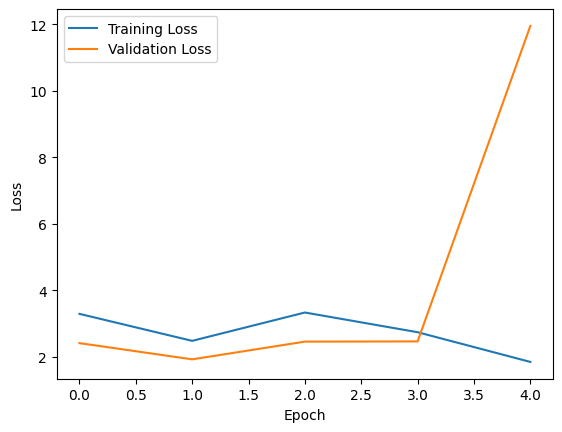

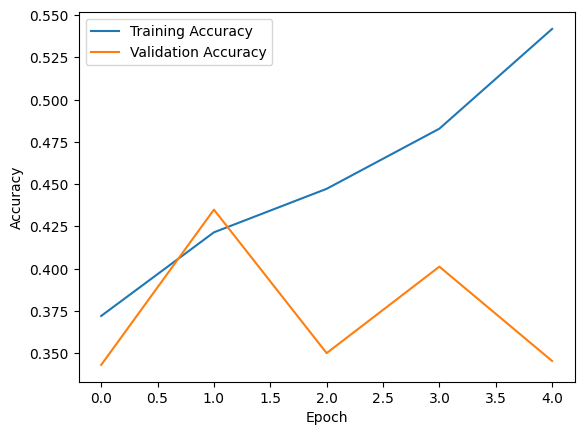

In [ ]:
import matplotlib.pyplot as plt



plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5
)


Epoch 1/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 24s 217ms/step - accuracy: 0.3308 - loss: 6.6744 - val_accuracy: 0.3698 - val_loss: 4.1546
Epoch 2/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 22s 204ms/step - accuracy: 0.4145 - loss: 2.7352 - val_accuracy: 0.4035 - val_loss: 2.3989
Epoch 3/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 41s 206ms/step - accuracy: 0.4498 - loss: 2.3701 - val_accuracy: 0.4035 - val_loss: 4.0578
Epoch 4/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 41s 205ms/step - accuracy: 0.4587 - loss: 3.2968 - val_accuracy: 0.3233 - val_loss: 5.7312
Epoch 5/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 23s 208ms/step - accuracy: 0.4854 - loss: 3.4106 - val_accuracy: 0.3802 - val_loss: 3.5936


Training with: Epochs=5, Batch Size=8, Image Size=16, Learning Rate=0.001, Hidden Units=64
Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 768)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │        49,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,541 (193.52 KB)

 Trainable params: 49,541 (193.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
433/433 ━━━━━━━━━━━━━━━━━━━━ 25s 56ms/step - accuracy: 0.3206 - loss: 1.5211 - val_accuracy: 0.4058 - val_loss: 1.3371
Epoch 2/5
433/433 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step - accuracy: 0.4353 - loss: 1.2801 - val_accuracy: 0.3884 - val_loss: 1.3385
Epoch 3/5
433/433 ━━━━━━━━━━━━━━━━━━━━ 22s 51ms/step - accuracy: 0.4688 - loss: 1.2186 - val_accuracy: 0.4163 - val_loss: 1.3037
Epoch 4/5
433/433 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.4783 - loss: 1.2091 - val_accuracy: 0.4279 - val_loss: 1.2814
Epoch 5/5
433/433 ━━━━━━━━━━━━━━━━━━━━ 22s 51ms/step - accuracy: 0.5109 - loss: 1.1545 - val_accuracy: 0.4233 - val_loss: 1.3096
Finished training with: Epochs=5, Batch Size=8, Image Size=16, Learning Rate=0.001, Hidden Units=64, Final Validation Accuracy: 0.4232558012008667


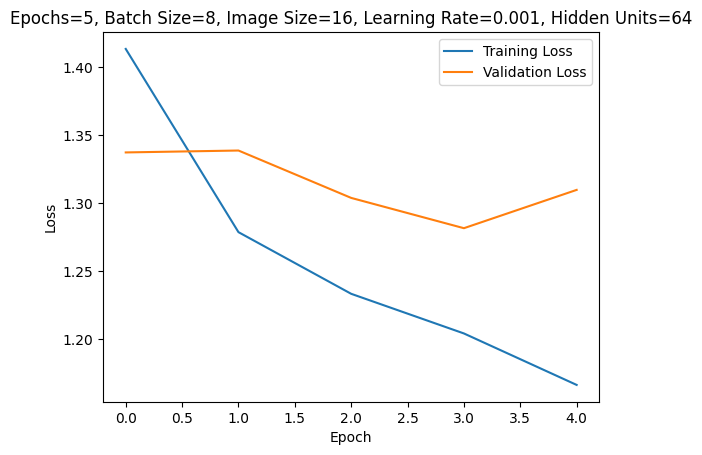

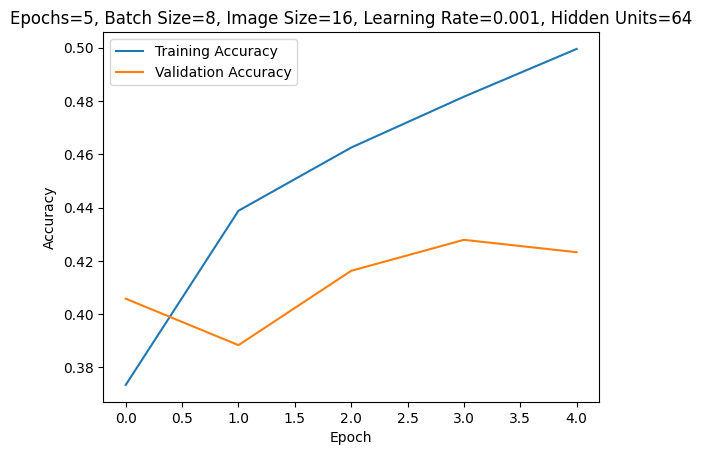

Training with: Epochs=5, Batch Size=8, Image Size=16, Learning Rate=0.001, Hidden Units=128
Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 768)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 99,077 (387.02 KB)

 Trainable params: 99,077 (387.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
433/433 ━━━━━━━━━━━━━━━━━━━━ 27s 62ms/step - accuracy: 0.3257 - loss: 1.5440 - val_accuracy: 0.4267 - val_loss: 1.2953
Epoch 2/5
433/433 ━━━━━━━━━━━━━━━━━━━━ 37s 52ms/step - accuracy: 0.4270 - loss: 1.2805 - val_accuracy: 0.4035 - val_loss: 1.3205
Epoch 3/5
433/433 ━━━━━━━━━━━━━━━━━━━━ 23s 52ms/step - accuracy: 0.4747 - loss: 1.2264 - val_accuracy: 0.4558 - val_loss: 1.2813
Epoch 4/5
433/433 ━━━━━━━━━━━━━━━━━━━━ 22s 51ms/step - accuracy: 0.5268 - loss: 1.1511 - val_accuracy: 0.4570 - val_loss: 1.2402
Epoch 5/5
433/433 ━━━━━━━━━━━━━━━━━━━━ 23s 52ms/step - accuracy: 0.5246 - loss: 1.1169 - val_accuracy: 0.4105 - val_loss: 1.4210
Finished training with: Epochs=5, Batch Size=8, Image Size=16, Learning Rate=0.001, Hidden Units=128, Final Validation Accuracy: 0.4104651212692261


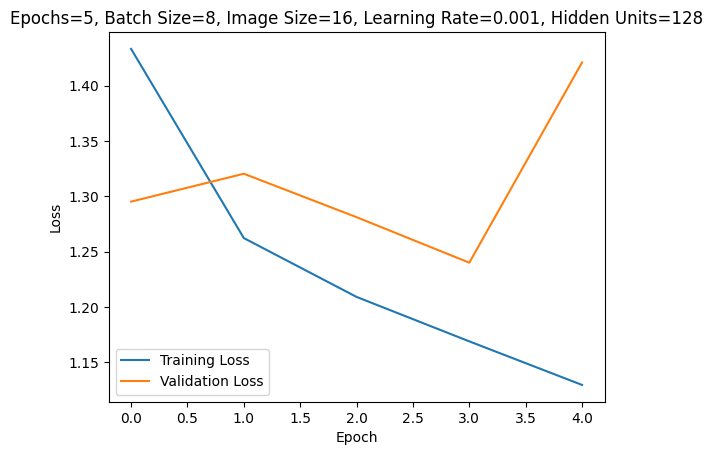

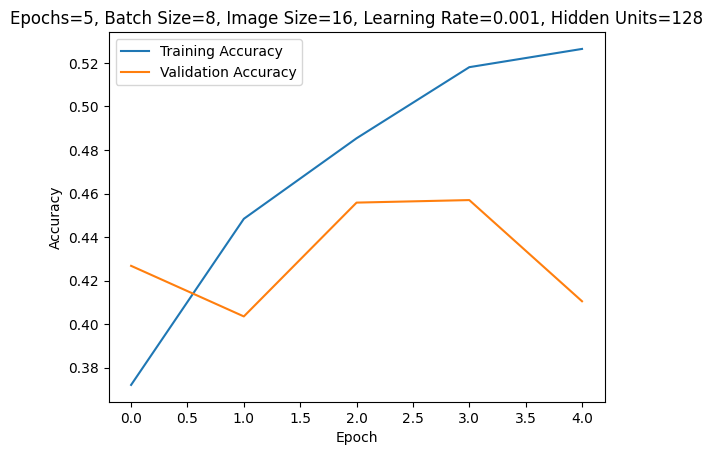

Training with: Epochs=5, Batch Size=8, Image Size=16, Learning Rate=0.0001, Hidden Units=64
Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 768)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │        49,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,541 (193.52 KB)

 Trainable params: 49,541 (193.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
433/433 ━━━━━━━━━━━━━━━━━━━━ 26s 58ms/step - accuracy: 0.2933 - loss: 1.5620 - val_accuracy: 0.3802 - val_loss: 1.3995
Epoch 2/5
433/433 ━━━━━━━━━━━━━━━━━━━━ 37s 49ms/step - accuracy: 0.4283 - loss: 1.3520 - val_accuracy: 0.4116 - val_loss: 1.3357
Epoch 3/5
433/433 ━━━━━━━━━━━━━━━━━━━━ 22s 52ms/step - accuracy: 0.4542 - loss: 1.2912 - val_accuracy: 0.4081 - val_loss: 1.3141
Epoch 4/5
433/433 ━━━━━━━━━━━━━━━━━━━━ 23s 52ms/step - accuracy: 0.4486 - loss: 1.2614 - val_accuracy: 0.4198 - val_loss: 1.2889
Epoch 5/5
433/433 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.4935 - loss: 1.2124 - val_accuracy: 0.4244 - val_loss: 1.2791
Finished training with: Epochs=5, Batch Size=8, Image Size=16, Learning Rate=0.0001, Hidden Units=64, Final Validation Accuracy: 0.4244185984134674


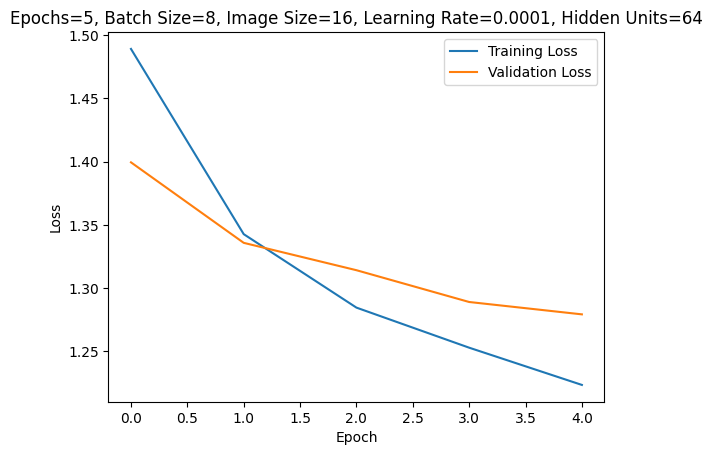

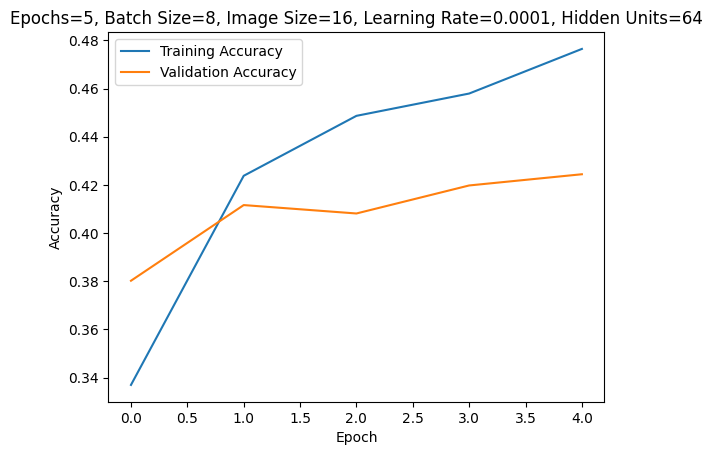

Training with: Epochs=5, Batch Size=8, Image Size=16, Learning Rate=0.0001, Hidden Units=128
Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 768)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 99,077 (387.02 KB)

 Trainable params: 99,077 (387.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
433/433 ━━━━━━━━━━━━━━━━━━━━ 27s 60ms/step - accuracy: 0.3092 - loss: 1.5411 - val_accuracy: 0.4070 - val_loss: 1.3926
Epoch 2/5
433/433 ━━━━━━━━━━━━━━━━━━━━ 38s 53ms/step - accuracy: 0.4375 - loss: 1.3342 - val_accuracy: 0.4233 - val_loss: 1.3326
Epoch 3/5
433/433 ━━━━━━━━━━━━━━━━━━━━ 22s 52ms/step - accuracy: 0.4819 - loss: 1.2532 - val_accuracy: 0.4349 - val_loss: 1.3139
Epoch 4/5
433/433 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.4917 - loss: 1.2059 - val_accuracy: 0.4279 - val_loss: 1.3072
Epoch 5/5
433/433 ━━━━━━━━━━━━━━━━━━━━ 40s 52ms/step - accuracy: 0.4889 - loss: 1.2058 - val_accuracy: 0.4500 - val_loss: 1.2809
Finished training with: Epochs=5, Batch Size=8, Image Size=16, Learning Rate=0.0001, Hidden Units=128, Final Validation Accuracy: 0.44999998807907104


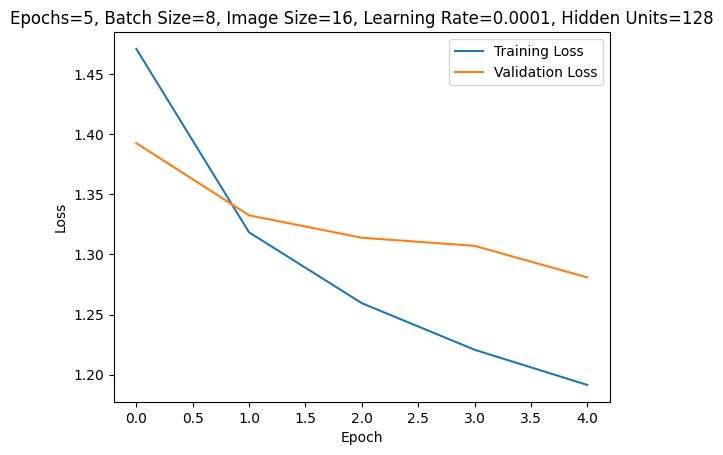

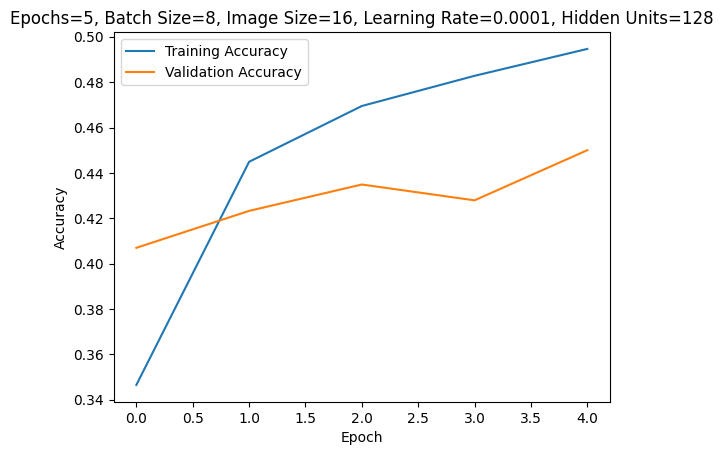

Training with: Epochs=5, Batch Size=8, Image Size=32, Learning Rate=0.001, Hidden Units=64
Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │       196,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 196,997 (769.52 KB)

 Trainable params: 196,997 (769.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
433/433 ━━━━━━━━━━━━━━━━━━━━ 29s 64ms/step - accuracy: 0.2946 - loss: 1.6110 - val_accuracy: 0.3477 - val_loss: 1.4411
Epoch 2/5
433/433 ━━━━━━━━━━━━━━━━━━━━ 37s 54ms/step - accuracy: 0.4102 - loss: 1.3098 - val_accuracy: 0.4349 - val_loss: 1.2804
Epoch 3/5
433/433 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - accuracy: 0.4420 - loss: 1.2446 - val_accuracy: 0.4081 - val_loss: 1.3445
Epoch 4/5
433/433 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - accuracy: 0.4597 - loss: 1.2073 - val_accuracy: 0.3953 - val_loss: 1.3328
Epoch 5/5
433/433 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.4619 - loss: 1.1828 - val_accuracy: 0.4256 - val_loss: 1.2628
Finished training with: Epochs=5, Batch Size=8, Image Size=32, Learning Rate=0.001, Hidden Units=64, Final Validation Accuracy: 0.4255813956260681


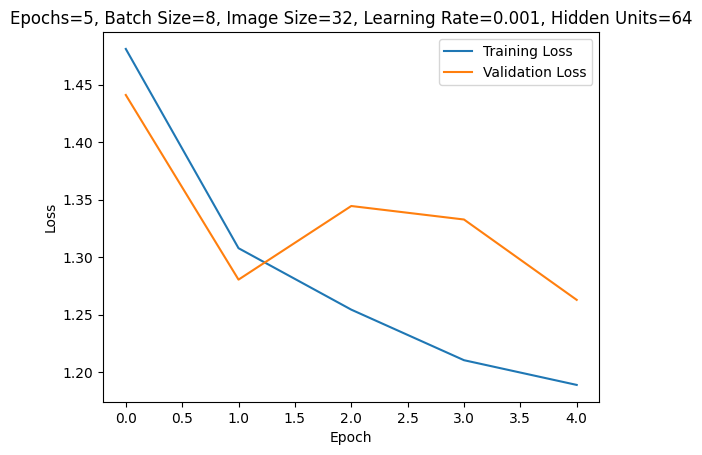

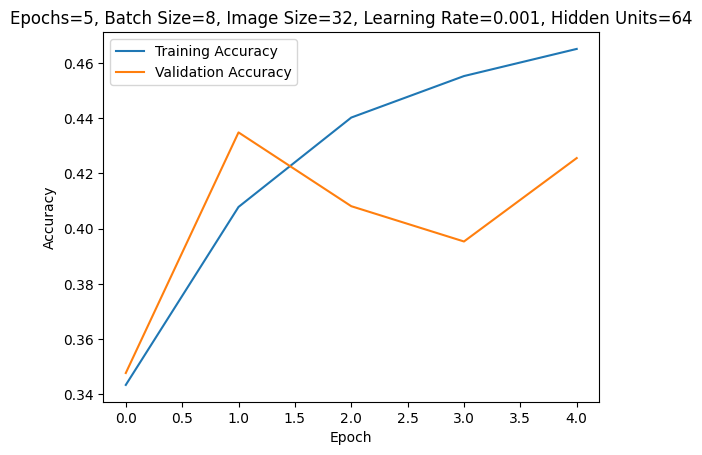

Training with: Epochs=5, Batch Size=8, Image Size=32, Learning Rate=0.001, Hidden Units=128
Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 393,989 (1.50 MB)

 Trainable params: 393,989 (1.50 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
433/433 ━━━━━━━━━━━━━━━━━━━━ 27s 61ms/step - accuracy: 0.3206 - loss: 1.6122 - val_accuracy: 0.4453 - val_loss: 1.2874
Epoch 2/5
433/433 ━━━━━━━━━━━━━━━━━━━━ 38s 54ms/step - accuracy: 0.4540 - loss: 1.2614 - val_accuracy: 0.4058 - val_loss: 1.3677
Epoch 3/5
433/433 ━━━━━━━━━━━━━━━━━━━━ 23s 54ms/step - accuracy: 0.4891 - loss: 1.2215 - val_accuracy: 0.4302 - val_loss: 1.2651
Epoch 4/5
433/433 ━━━━━━━━━━━━━━━━━━━━ 25s 57ms/step - accuracy: 0.5153 - loss: 1.1611 - val_accuracy: 0.4244 - val_loss: 1.3266
Epoch 5/5
433/433 ━━━━━━━━━━━━━━━━━━━━ 41s 57ms/step - accuracy: 0.5150 - loss: 1.1529 - val_accuracy: 0.4186 - val_loss: 1.3059
Finished training with: Epochs=5, Batch Size=8, Image Size=32, Learning Rate=0.001, Hidden Units=128, Final Validation Accuracy: 0.41860464215278625


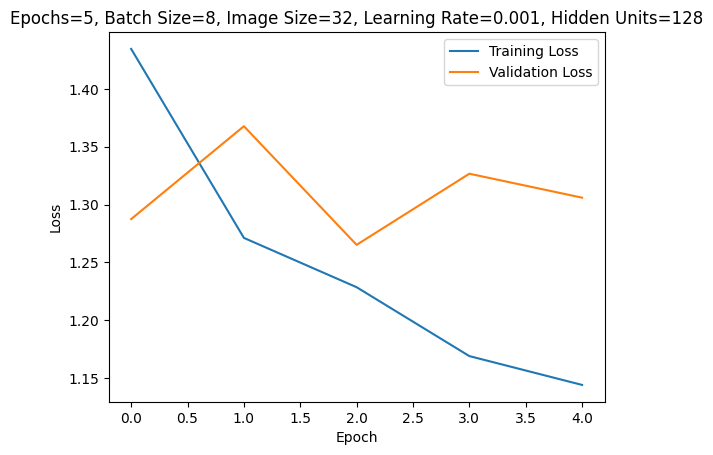

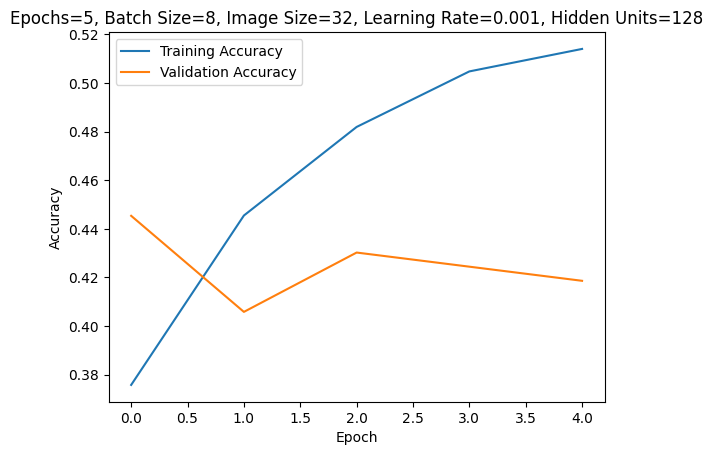

Training with: Epochs=5, Batch Size=8, Image Size=32, Learning Rate=0.0001, Hidden Units=64
Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │       196,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 196,997 (769.52 KB)

 Trainable params: 196,997 (769.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
433/433 ━━━━━━━━━━━━━━━━━━━━ 28s 64ms/step - accuracy: 0.3214 - loss: 1.5021 - val_accuracy: 0.3919 - val_loss: 1.3771
Epoch 2/5
433/433 ━━━━━━━━━━━━━━━━━━━━ 23s 54ms/step - accuracy: 0.4354 - loss: 1.3164 - val_accuracy: 0.4186 - val_loss: 1.3347
Epoch 3/5
433/433 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.4671 - loss: 1.2388 - val_accuracy: 0.4244 - val_loss: 1.2993
Epoch 4/5
433/433 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - accuracy: 0.4939 - loss: 1.1968 - val_accuracy: 0.4419 - val_loss: 1.2942
Epoch 5/5
433/433 ━━━━━━━━━━━━━━━━━━━━ 42s 56ms/step - accuracy: 0.5219 - loss: 1.1589 - val_accuracy: 0.4267 - val_loss: 1.3291
Finished training with: Epochs=5, Batch Size=8, Image Size=32, Learning Rate=0.0001, Hidden Units=64, Final Validation Accuracy: 0.4267441928386688


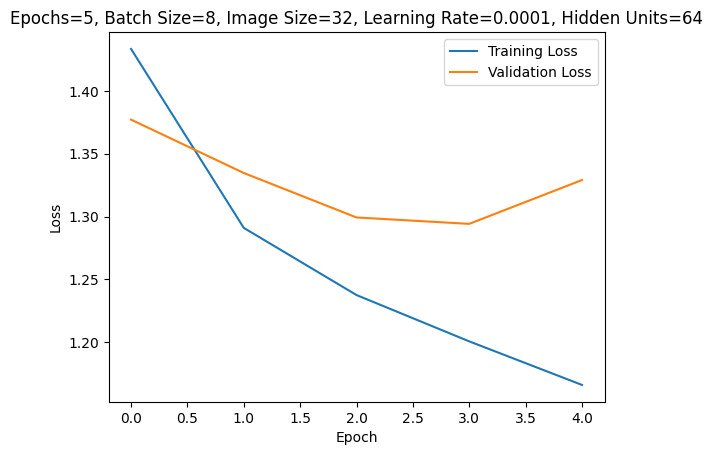

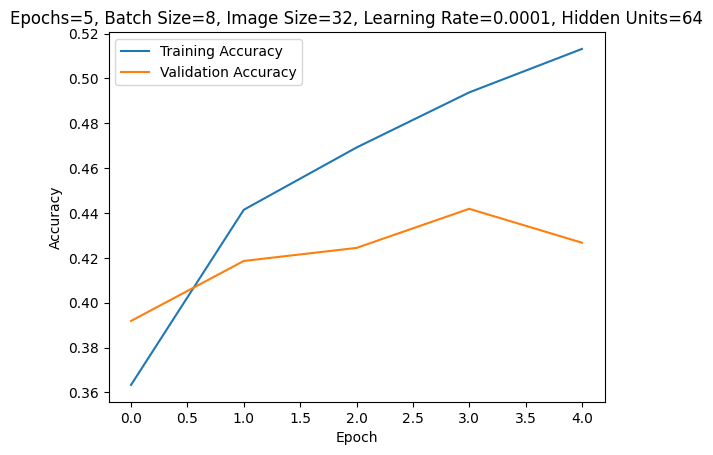

Training with: Epochs=5, Batch Size=8, Image Size=32, Learning Rate=0.0001, Hidden Units=128
Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)            │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 393,989 (1.50 MB)

 Trainable params: 393,989 (1.50 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
433/433 ━━━━━━━━━━━━━━━━━━━━ 30s 68ms/step - accuracy: 0.3286 - loss: 1.5173 - val_accuracy: 0.4070 - val_loss: 1.4008
Epoch 2/5
433/433 ━━━━━━━━━━━━━━━━━━━━ 36s 56ms/step - accuracy: 0.4427 - loss: 1.2746 - val_accuracy: 0.4384 - val_loss: 1.3471
Epoch 3/5
433/433 ━━━━━━━━━━━━━━━━━━━━ 41s 56ms/step - accuracy: 0.4703 - loss: 1.2143 - val_accuracy: 0.4198 - val_loss: 1.2886
Epoch 4/5
433/433 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.5184 - loss: 1.1607 - val_accuracy: 0.4419 - val_loss: 1.3198
Epoch 5/5
433/433 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.5553 - loss: 1.0900 - val_accuracy: 0.4663 - val_loss: 1.2430
Finished training with: Epochs=5, Batch Size=8, Image Size=32, Learning Rate=0.0001, Hidden Units=128, Final Validation Accuracy: 0.4662790596485138


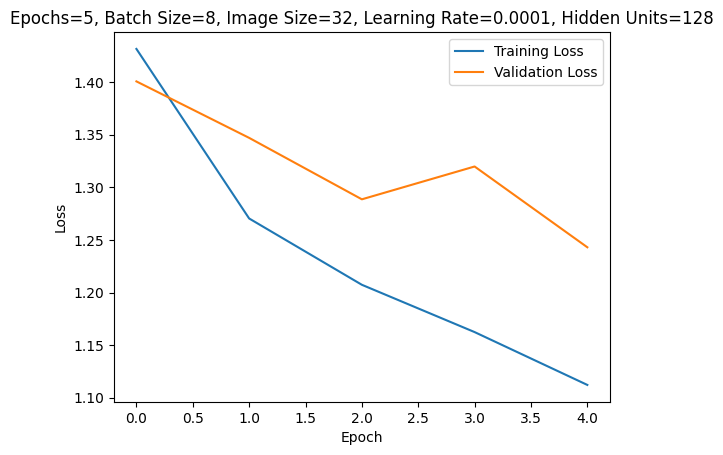

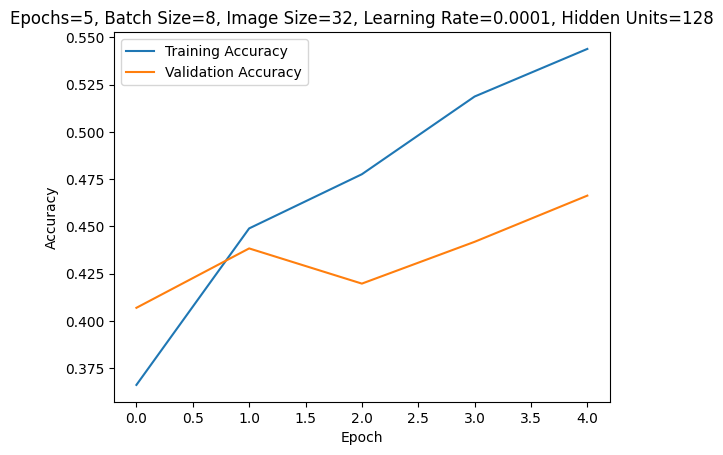

Training with: Epochs=5, Batch Size=16, Image Size=16, Learning Rate=0.001, Hidden Units=64
Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_11 (Flatten)            │ (None, 768)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │        49,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,541 (193.52 KB)

 Trainable params: 49,541 (193.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 24s 101ms/step - accuracy: 0.3447 - loss: 1.4961 - val_accuracy: 0.4000 - val_loss: 1.3548
Epoch 2/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 22s 103ms/step - accuracy: 0.4441 - loss: 1.2893 - val_accuracy: 0.4291 - val_loss: 1.2682
Epoch 3/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 21s 99ms/step - accuracy: 0.4707 - loss: 1.2173 - val_accuracy: 0.4407 - val_loss: 1.2973
Epoch 4/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 21s 96ms/step - accuracy: 0.5034 - loss: 1.1867 - val_accuracy: 0.4105 - val_loss: 1.2837
Epoch 5/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 22s 101ms/step - accuracy: 0.5213 - loss: 1.1514 - val_accuracy: 0.4581 - val_loss: 1.2558
Finished training with: Epochs=5, Batch Size=16, Image Size=16, Learning Rate=0.001, Hidden Units=64, Final Validation Accuracy: 0.4581395387649536


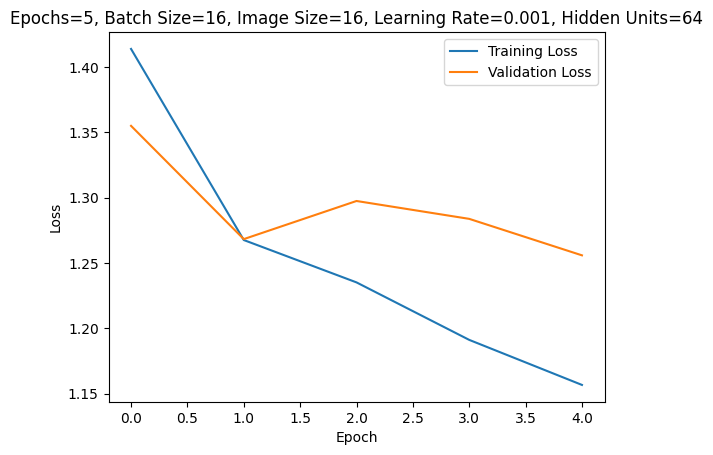

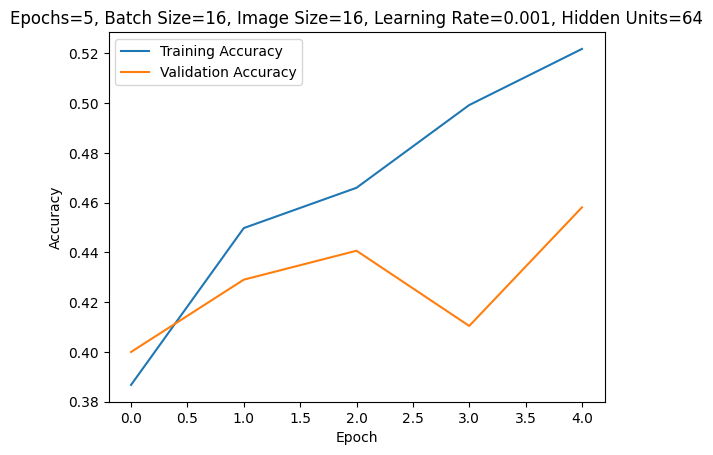

Training with: Epochs=5, Batch Size=16, Image Size=16, Learning Rate=0.001, Hidden Units=128
Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_12 (Flatten)            │ (None, 768)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 99,077 (387.02 KB)

 Trainable params: 99,077 (387.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 23s 104ms/step - accuracy: 0.3256 - loss: 1.5306 - val_accuracy: 0.4267 - val_loss: 1.3642
Epoch 2/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 21s 96ms/step - accuracy: 0.4128 - loss: 1.3073 - val_accuracy: 0.4500 - val_loss: 1.2741
Epoch 3/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 21s 99ms/step - accuracy: 0.4794 - loss: 1.2266 - val_accuracy: 0.4500 - val_loss: 1.2686
Epoch 4/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 21s 96ms/step - accuracy: 0.5118 - loss: 1.1693 - val_accuracy: 0.4535 - val_loss: 1.2721
Epoch 5/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 41s 97ms/step - accuracy: 0.5268 - loss: 1.1231 - val_accuracy: 0.4581 - val_loss: 1.2365
Finished training with: Epochs=5, Batch Size=16, Image Size=16, Learning Rate=0.001, Hidden Units=128, Final Validation Accuracy: 0.4581395387649536


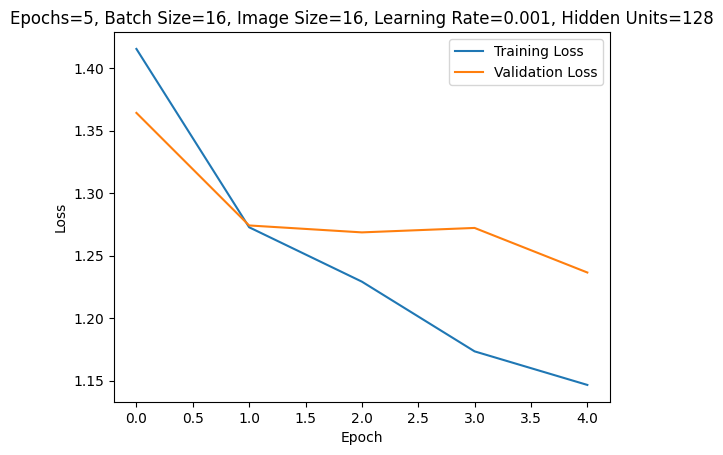

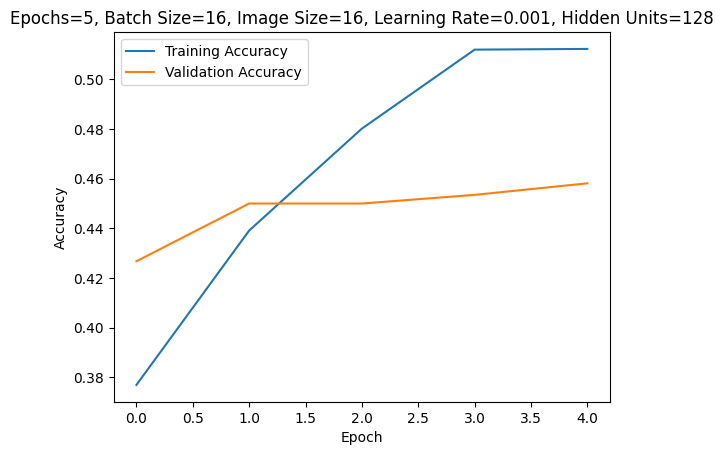

Training with: Epochs=5, Batch Size=16, Image Size=16, Learning Rate=0.0001, Hidden Units=64
Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_13 (Flatten)            │ (None, 768)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 64)             │        49,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,541 (193.52 KB)

 Trainable params: 49,541 (193.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 26s 98ms/step - accuracy: 0.2416 - loss: 1.5974 - val_accuracy: 0.3477 - val_loss: 1.4670
Epoch 2/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 21s 99ms/step - accuracy: 0.4053 - loss: 1.4163 - val_accuracy: 0.3733 - val_loss: 1.3805
Epoch 3/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 41s 99ms/step - accuracy: 0.4177 - loss: 1.3587 - val_accuracy: 0.4000 - val_loss: 1.3401
Epoch 4/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 41s 99ms/step - accuracy: 0.4407 - loss: 1.3099 - val_accuracy: 0.4023 - val_loss: 1.3214
Epoch 5/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 21s 97ms/step - accuracy: 0.4628 - loss: 1.2768 - val_accuracy: 0.4314 - val_loss: 1.3044
Finished training with: Epochs=5, Batch Size=16, Image Size=16, Learning Rate=0.0001, Hidden Units=64, Final Validation Accuracy: 0.43139535188674927


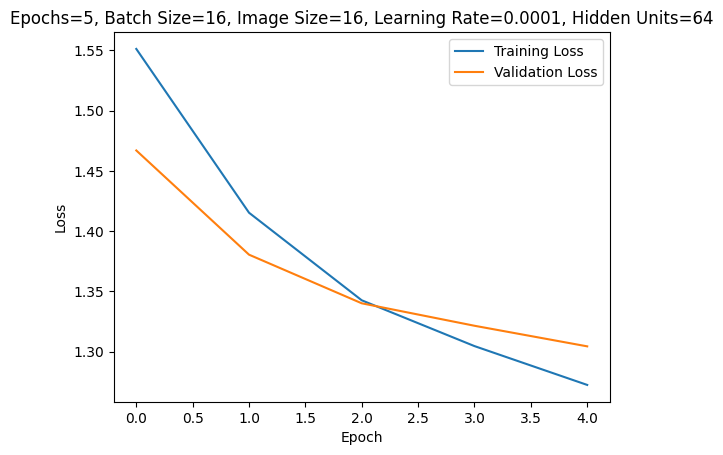

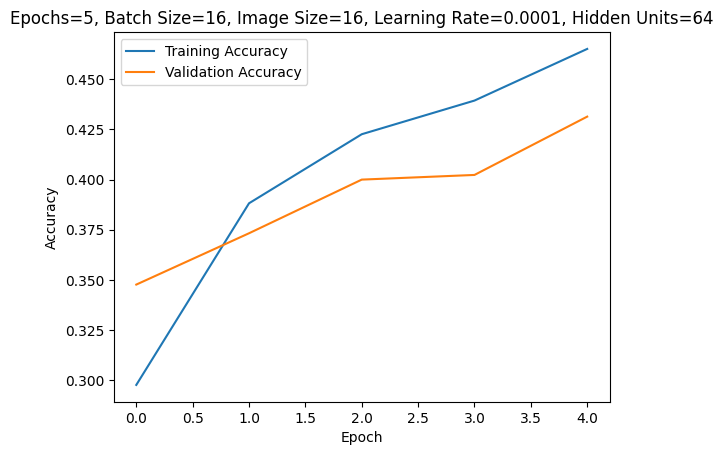

Training with: Epochs=5, Batch Size=16, Image Size=16, Learning Rate=0.0001, Hidden Units=128
Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_14 (Flatten)            │ (None, 768)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 128)            │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 99,077 (387.02 KB)

 Trainable params: 99,077 (387.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 26s 101ms/step - accuracy: 0.2573 - loss: 1.5895 - val_accuracy: 0.4012 - val_loss: 1.4233
Epoch 2/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 39s 104ms/step - accuracy: 0.4064 - loss: 1.3914 - val_accuracy: 0.4151 - val_loss: 1.3713
Epoch 3/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 23s 104ms/step - accuracy: 0.4429 - loss: 1.3072 - val_accuracy: 0.4256 - val_loss: 1.3264
Epoch 4/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 41s 103ms/step - accuracy: 0.4754 - loss: 1.2617 - val_accuracy: 0.4279 - val_loss: 1.3053
Epoch 5/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 22s 102ms/step - accuracy: 0.4899 - loss: 1.2309 - val_accuracy: 0.4419 - val_loss: 1.2774
Finished training with: Epochs=5, Batch Size=16, Image Size=16, Learning Rate=0.0001, Hidden Units=128, Final Validation Accuracy: 0.44186046719551086


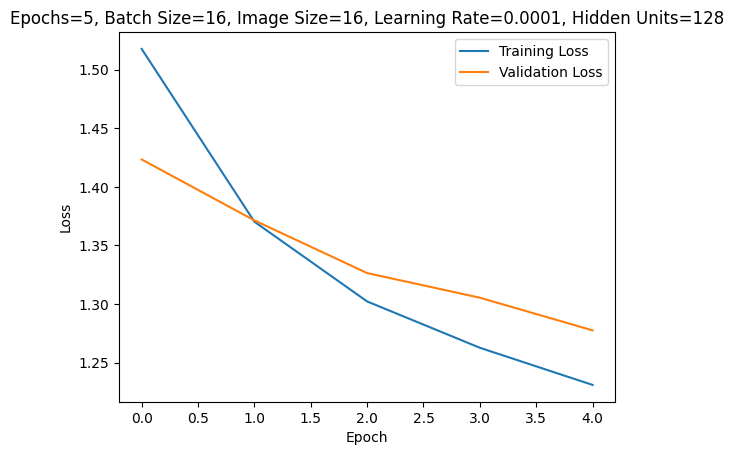

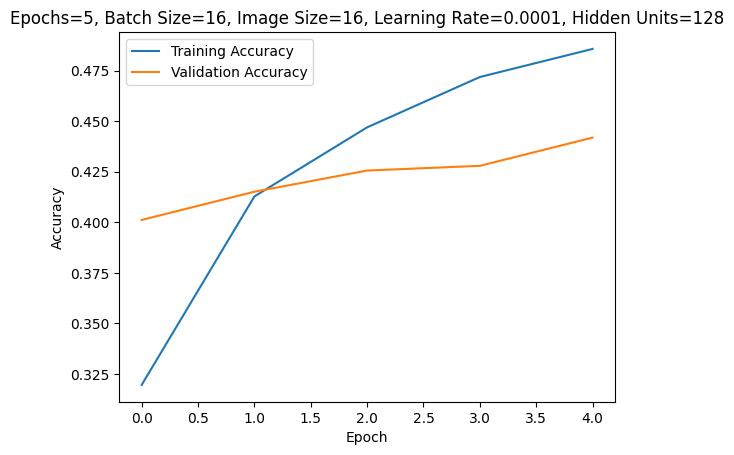

Training with: Epochs=5, Batch Size=16, Image Size=32, Learning Rate=0.001, Hidden Units=64
Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_15 (Flatten)            │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 64)             │       196,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 196,997 (769.52 KB)

 Trainable params: 196,997 (769.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 26s 104ms/step - accuracy: 0.3070 - loss: 1.6040 - val_accuracy: 0.3756 - val_loss: 1.4228
Epoch 2/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 38s 104ms/step - accuracy: 0.4551 - loss: 1.3152 - val_accuracy: 0.4186 - val_loss: 1.3120
Epoch 3/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 23s 106ms/step - accuracy: 0.4805 - loss: 1.2363 - val_accuracy: 0.4547 - val_loss: 1.2622
Epoch 4/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 41s 105ms/step - accuracy: 0.5126 - loss: 1.1616 - val_accuracy: 0.4407 - val_loss: 1.2874
Epoch 5/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 41s 106ms/step - accuracy: 0.5248 - loss: 1.1295 - val_accuracy: 0.4453 - val_loss: 1.2986
Finished training with: Epochs=5, Batch Size=16, Image Size=32, Learning Rate=0.001, Hidden Units=64, Final Validation Accuracy: 0.4453488290309906


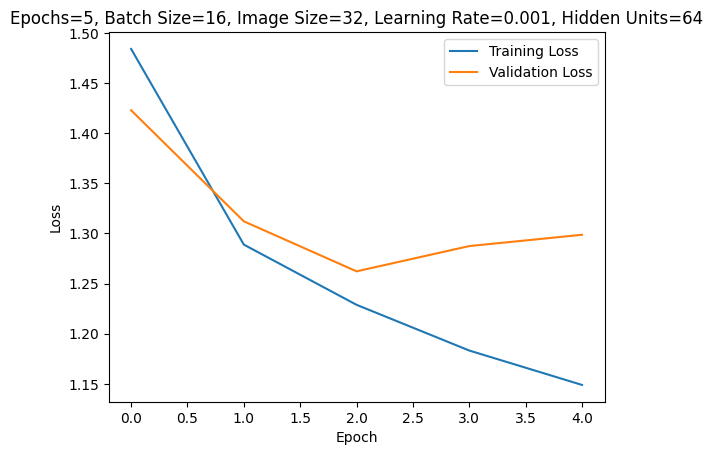

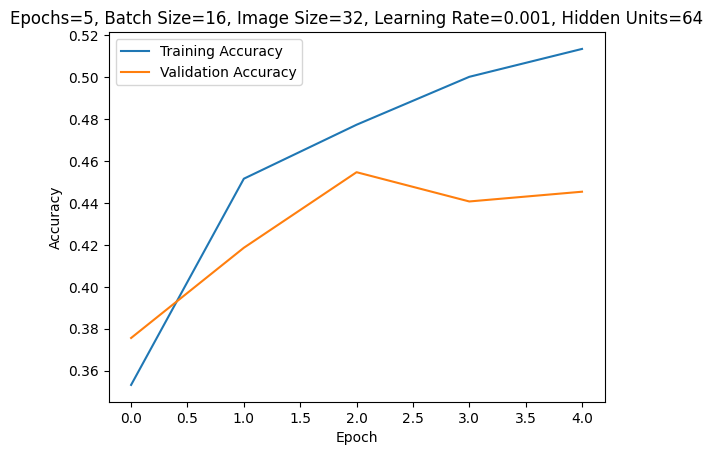

Training with: Epochs=5, Batch Size=16, Image Size=32, Learning Rate=0.001, Hidden Units=128
Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_16 (Flatten)            │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 393,989 (1.50 MB)

 Trainable params: 393,989 (1.50 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 26s 105ms/step - accuracy: 0.3430 - loss: 1.5897 - val_accuracy: 0.4035 - val_loss: 1.3666
Epoch 2/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 39s 106ms/step - accuracy: 0.4523 - loss: 1.2690 - val_accuracy: 0.4477 - val_loss: 1.2810
Epoch 3/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 23s 108ms/step - accuracy: 0.4987 - loss: 1.1848 - val_accuracy: 0.4326 - val_loss: 1.3340
Epoch 4/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 23s 105ms/step - accuracy: 0.5197 - loss: 1.1471 - val_accuracy: 0.4488 - val_loss: 1.2763
Epoch 5/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 40s 102ms/step - accuracy: 0.5478 - loss: 1.1239 - val_accuracy: 0.4779 - val_loss: 1.2633
Finished training with: Epochs=5, Batch Size=16, Image Size=32, Learning Rate=0.001, Hidden Units=128, Final Validation Accuracy: 0.4779069721698761


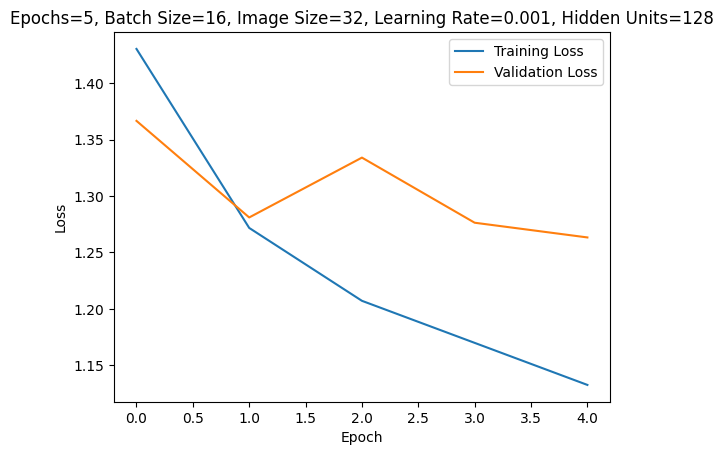

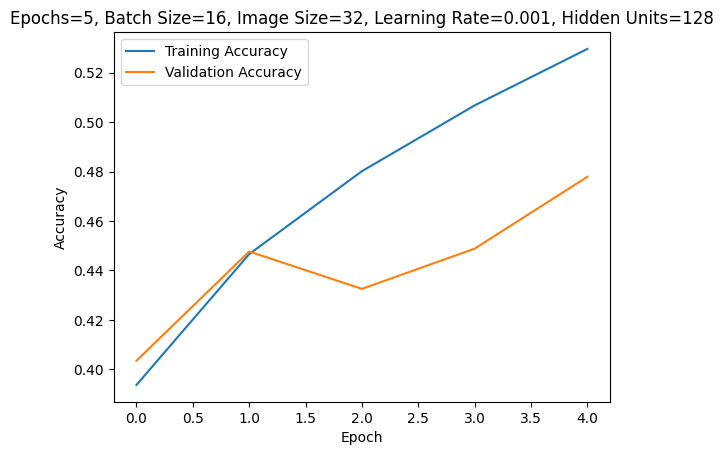

Training with: Epochs=5, Batch Size=16, Image Size=32, Learning Rate=0.0001, Hidden Units=64
Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_17 (Flatten)            │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 64)             │       196,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 196,997 (769.52 KB)

 Trainable params: 196,997 (769.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 29s 107ms/step - accuracy: 0.3191 - loss: 1.5085 - val_accuracy: 0.4070 - val_loss: 1.3491
Epoch 2/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 23s 107ms/step - accuracy: 0.4529 - loss: 1.3107 - val_accuracy: 0.4419 - val_loss: 1.2983
Epoch 3/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 24s 110ms/step - accuracy: 0.4748 - loss: 1.2280 - val_accuracy: 0.4477 - val_loss: 1.2925
Epoch 4/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 39s 102ms/step - accuracy: 0.4954 - loss: 1.2114 - val_accuracy: 0.4663 - val_loss: 1.2707
Epoch 5/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 22s 102ms/step - accuracy: 0.5292 - loss: 1.1460 - val_accuracy: 0.4384 - val_loss: 1.2771
Finished training with: Epochs=5, Batch Size=16, Image Size=32, Learning Rate=0.0001, Hidden Units=64, Final Validation Accuracy: 0.43837210536003113


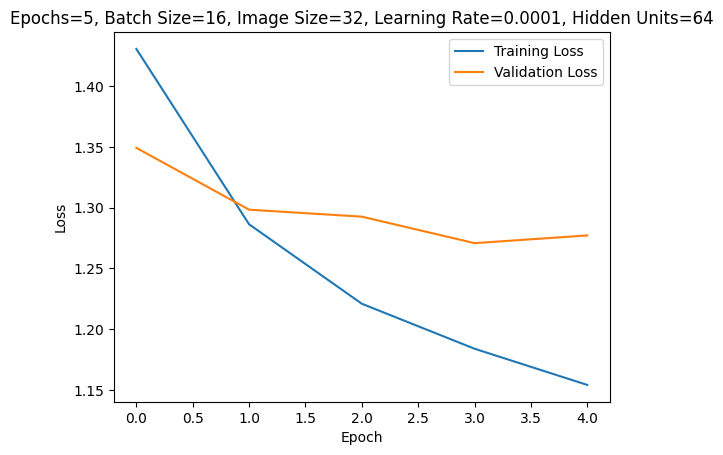

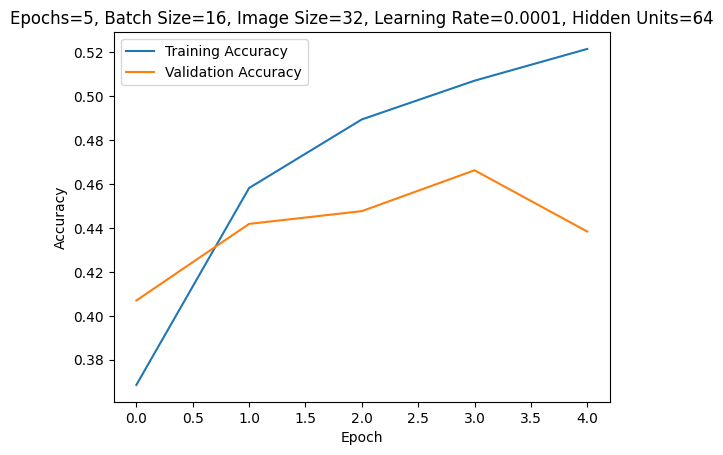

Training with: Epochs=5, Batch Size=16, Image Size=32, Learning Rate=0.0001, Hidden Units=128
Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_18 (Flatten)            │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 393,989 (1.50 MB)

 Trainable params: 393,989 (1.50 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 24s 108ms/step - accuracy: 0.3073 - loss: 1.5271 - val_accuracy: 0.3674 - val_loss: 1.4122
Epoch 2/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 40s 106ms/step - accuracy: 0.4539 - loss: 1.2927 - val_accuracy: 0.4116 - val_loss: 1.3054
Epoch 3/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 41s 106ms/step - accuracy: 0.5059 - loss: 1.2184 - val_accuracy: 0.4302 - val_loss: 1.3645
Epoch 4/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 40s 103ms/step - accuracy: 0.4963 - loss: 1.2205 - val_accuracy: 0.4395 - val_loss: 1.2913
Epoch 5/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 41s 103ms/step - accuracy: 0.5336 - loss: 1.1331 - val_accuracy: 0.4244 - val_loss: 1.3201
Finished training with: Epochs=5, Batch Size=16, Image Size=32, Learning Rate=0.0001, Hidden Units=128, Final Validation Accuracy: 0.4244185984134674


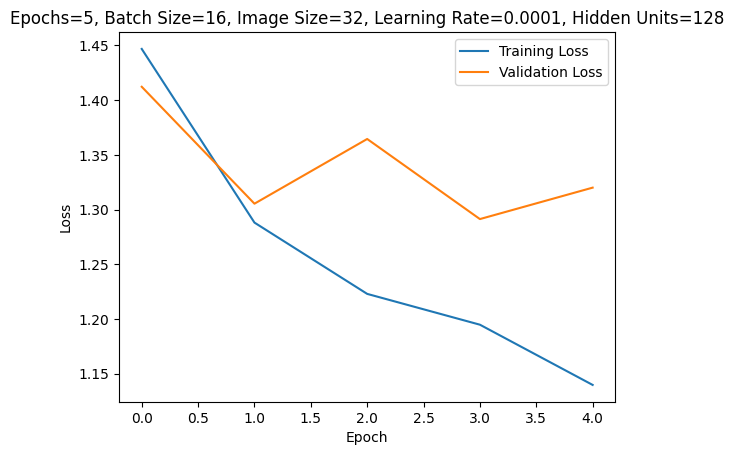

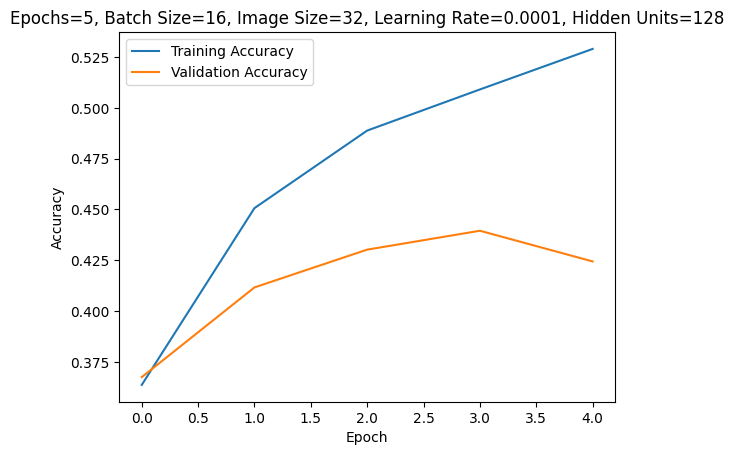

Training with: Epochs=10, Batch Size=8, Image Size=16, Learning Rate=0.001, Hidden Units=64
Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_19 (Flatten)            │ (None, 768)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 64)             │        49,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,541 (193.52 KB)

 Trainable params: 49,541 (193.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 25s 56ms/step - accuracy: 0.3311 - loss: 1.4750 - val_accuracy: 0.4314 - val_loss: 1.3418
Epoch 2/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 40s 55ms/step - accuracy: 0.4586 - loss: 1.2553 - val_accuracy: 0.4314 - val_loss: 1.3070
Epoch 3/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 23s 52ms/step - accuracy: 0.4866 - loss: 1.2045 - val_accuracy: 0.4302 - val_loss: 1.2899
Epoch 4/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step - accuracy: 0.4901 - loss: 1.1876 - val_accuracy: 0.4291 - val_loss: 1.3661
Epoch 5/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.5255 - loss: 1.1374 - val_accuracy: 0.4244 - val_loss: 1.3280
Epoch 6/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 24s 56ms/step - accuracy: 0.5307 - loss: 1.1145 - val_accuracy: 0.4512 - val_loss: 1.2772
Epoch 7/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 40s 54ms/step - accuracy: 0.5539 - loss: 1.0706 - val_accuracy: 0.4233 - val_loss: 1.3091
Epoch 8/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 22s 52ms/step - accuracy: 0.5458 - loss: 1.0700 - 

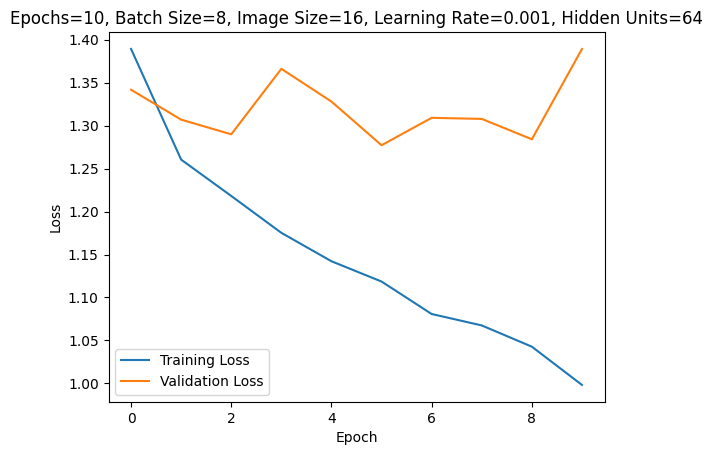

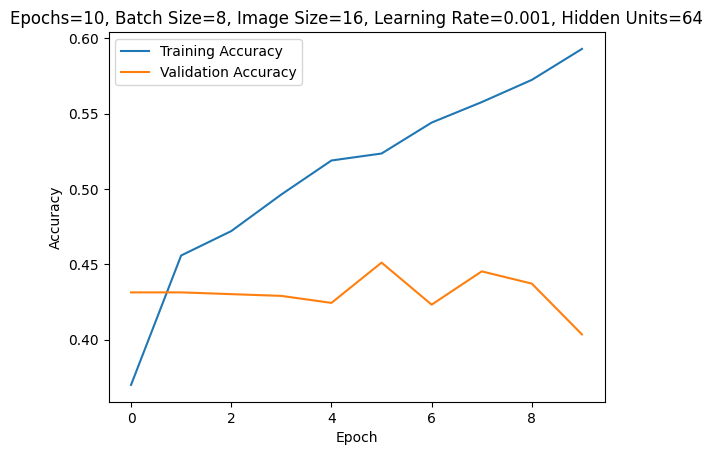

Training with: Epochs=10, Batch Size=8, Image Size=16, Learning Rate=0.001, Hidden Units=128
Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_20 (Flatten)            │ (None, 768)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 128)            │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 99,077 (387.02 KB)

 Trainable params: 99,077 (387.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 28s 60ms/step - accuracy: 0.3288 - loss: 1.5077 - val_accuracy: 0.4000 - val_loss: 1.3223
Epoch 2/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 40s 57ms/step - accuracy: 0.4344 - loss: 1.2864 - val_accuracy: 0.4151 - val_loss: 1.3159
Epoch 3/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 40s 55ms/step - accuracy: 0.4714 - loss: 1.2359 - val_accuracy: 0.4105 - val_loss: 1.2728
Epoch 4/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 23s 53ms/step - accuracy: 0.4848 - loss: 1.1800 - val_accuracy: 0.4570 - val_loss: 1.2841
Epoch 5/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - accuracy: 0.5217 - loss: 1.1259 - val_accuracy: 0.4523 - val_loss: 1.2633
Epoch 6/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 25s 57ms/step - accuracy: 0.5464 - loss: 1.1000 - val_accuracy: 0.4314 - val_loss: 1.3062
Epoch 7/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 40s 56ms/step - accuracy: 0.5598 - loss: 1.0872 - val_accuracy: 0.4558 - val_loss: 1.2554
Epoch 8/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 41s 56ms/step - accuracy: 0.5726 - loss: 1.0370 - 

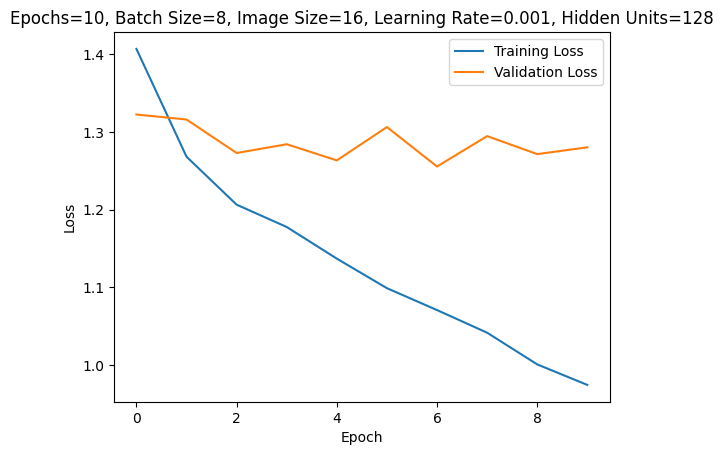

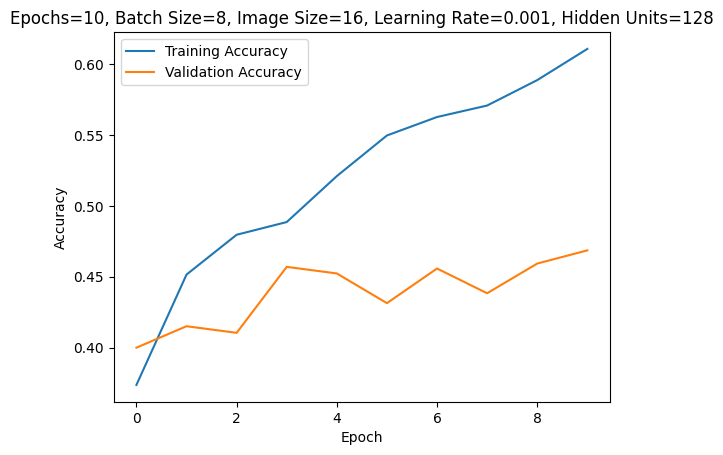

Training with: Epochs=10, Batch Size=8, Image Size=16, Learning Rate=0.0001, Hidden Units=64
Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_21 (Flatten)            │ (None, 768)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 64)             │        49,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,541 (193.52 KB)

 Trainable params: 49,541 (193.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 27s 61ms/step - accuracy: 0.2859 - loss: 1.5732 - val_accuracy: 0.3674 - val_loss: 1.4237
Epoch 2/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 39s 57ms/step - accuracy: 0.4112 - loss: 1.3618 - val_accuracy: 0.4047 - val_loss: 1.3568
Epoch 3/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 41s 56ms/step - accuracy: 0.4472 - loss: 1.2931 - val_accuracy: 0.4128 - val_loss: 1.3423
Epoch 4/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 40s 54ms/step - accuracy: 0.4507 - loss: 1.2773 - val_accuracy: 0.4477 - val_loss: 1.2898
Epoch 5/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 24s 56ms/step - accuracy: 0.4930 - loss: 1.2157 - val_accuracy: 0.4488 - val_loss: 1.2807
Epoch 6/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 41s 56ms/step - accuracy: 0.4976 - loss: 1.1963 - val_accuracy: 0.4442 - val_loss: 1.2817
Epoch 7/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 40s 55ms/step - accuracy: 0.5163 - loss: 1.1812 - val_accuracy: 0.4488 - val_loss: 1.2653
Epoch 8/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 42s 56ms/step - accuracy: 0.4972 - loss: 1.2135 - 

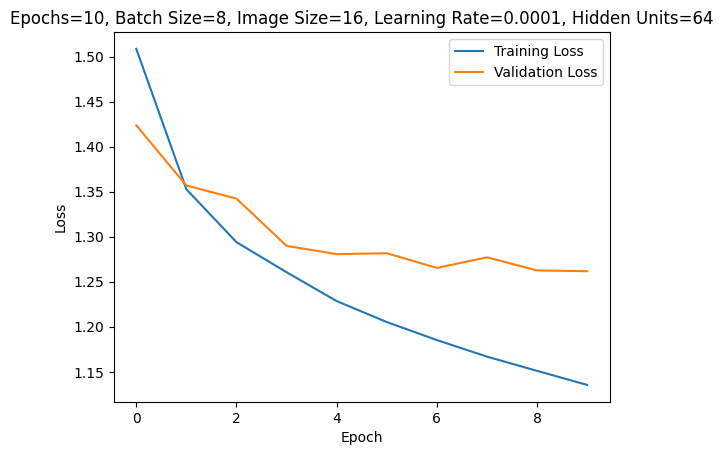

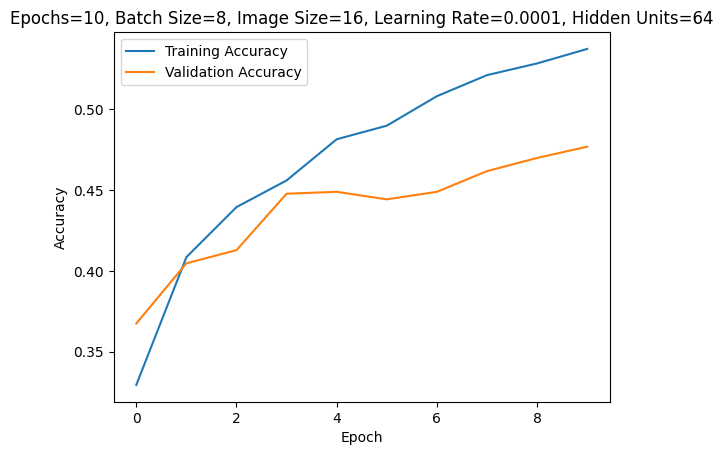

Training with: Epochs=10, Batch Size=8, Image Size=16, Learning Rate=0.0001, Hidden Units=128
Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_22 (Flatten)            │ (None, 768)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 128)            │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 99,077 (387.02 KB)

 Trainable params: 99,077 (387.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 27s 61ms/step - accuracy: 0.2846 - loss: 1.5686 - val_accuracy: 0.3430 - val_loss: 1.4431
Epoch 2/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 37s 53ms/step - accuracy: 0.4133 - loss: 1.3531 - val_accuracy: 0.3942 - val_loss: 1.3442
Epoch 3/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step - accuracy: 0.4598 - loss: 1.2776 - val_accuracy: 0.4233 - val_loss: 1.3245
Epoch 4/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - accuracy: 0.4732 - loss: 1.2345 - val_accuracy: 0.4244 - val_loss: 1.3268
Epoch 5/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 26s 60ms/step - accuracy: 0.4871 - loss: 1.2259 - val_accuracy: 0.4558 - val_loss: 1.2828
Epoch 6/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 39s 55ms/step - accuracy: 0.5009 - loss: 1.1824 - val_accuracy: 0.4628 - val_loss: 1.2651
Epoch 7/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 42s 57ms/step - accuracy: 0.5510 - loss: 1.1251 - val_accuracy: 0.4709 - val_loss: 1.2549
Epoch 8/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 41s 56ms/step - accuracy: 0.5440 - loss: 1.1441 - 

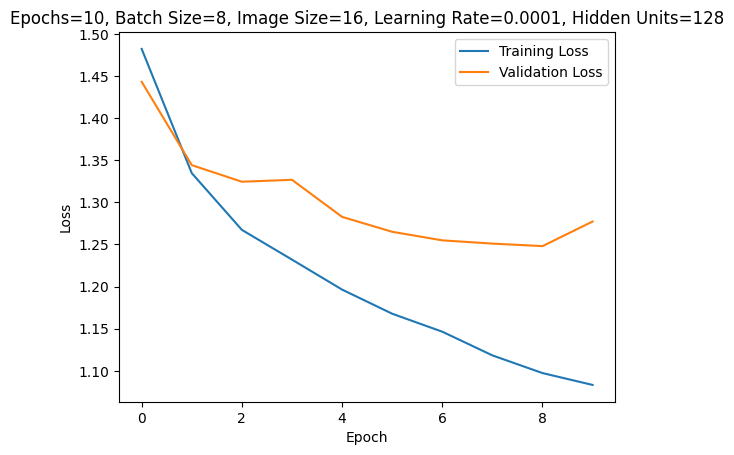

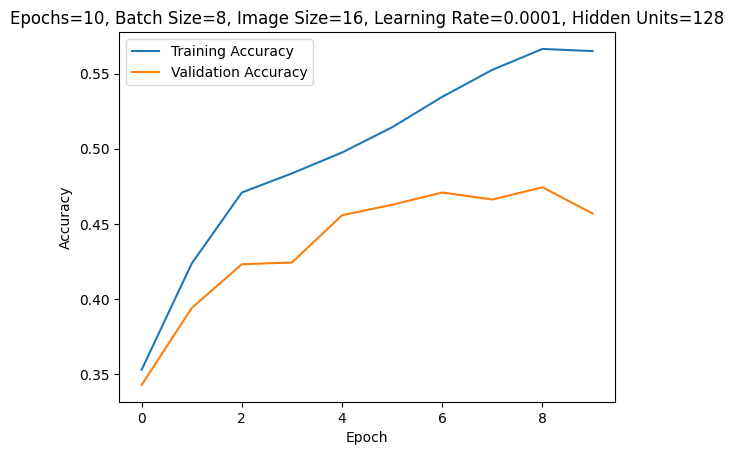

Training with: Epochs=10, Batch Size=8, Image Size=32, Learning Rate=0.001, Hidden Units=64
Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_23 (Flatten)            │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 64)             │       196,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 196,997 (769.52 KB)

 Trainable params: 196,997 (769.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 30s 66ms/step - accuracy: 0.3358 - loss: 1.5013 - val_accuracy: 0.4140 - val_loss: 1.3151
Epoch 2/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 26s 61ms/step - accuracy: 0.4489 - loss: 1.2832 - val_accuracy: 0.4279 - val_loss: 1.2752
Epoch 3/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 41s 60ms/step - accuracy: 0.4766 - loss: 1.2309 - val_accuracy: 0.4453 - val_loss: 1.3027
Epoch 4/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 26s 59ms/step - accuracy: 0.4912 - loss: 1.1848 - val_accuracy: 0.4465 - val_loss: 1.2688
Epoch 5/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 40s 58ms/step - accuracy: 0.5299 - loss: 1.1278 - val_accuracy: 0.4756 - val_loss: 1.2482
Epoch 6/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 26s 60ms/step - accuracy: 0.5282 - loss: 1.1181 - val_accuracy: 0.4360 - val_loss: 1.4311
Epoch 7/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 40s 58ms/step - accuracy: 0.5427 - loss: 1.1203 - val_accuracy: 0.4674 - val_loss: 1.2692
Epoch 8/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 41s 59ms/step - accuracy: 0.5732 - loss: 1.0345 - 

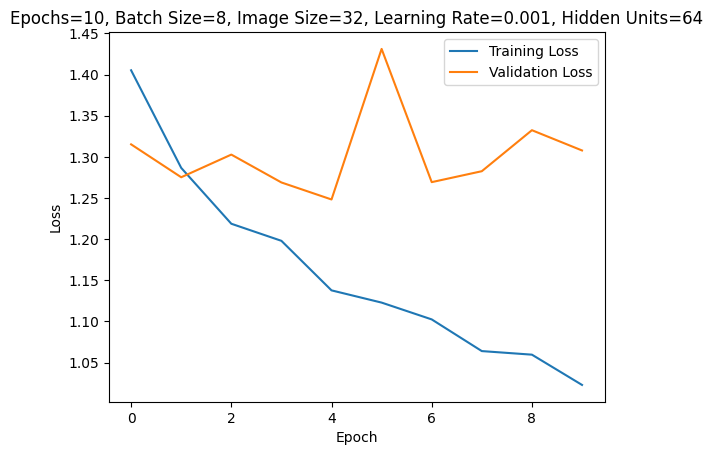

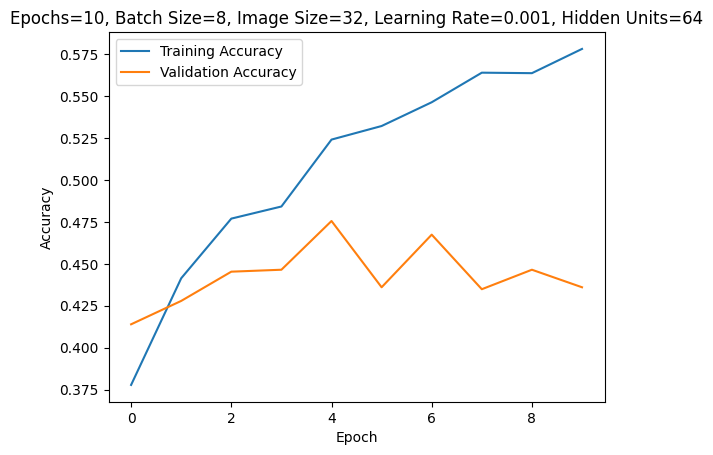

Training with: Epochs=10, Batch Size=8, Image Size=32, Learning Rate=0.001, Hidden Units=128
Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_24 (Flatten)            │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 393,989 (1.50 MB)

 Trainable params: 393,989 (1.50 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 32s 71ms/step - accuracy: 0.3409 - loss: 1.5963 - val_accuracy: 0.4349 - val_loss: 1.3392
Epoch 2/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 37s 63ms/step - accuracy: 0.4573 - loss: 1.2687 - val_accuracy: 0.3953 - val_loss: 1.2788
Epoch 3/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 28s 64ms/step - accuracy: 0.4658 - loss: 1.2261 - val_accuracy: 0.4465 - val_loss: 1.2550
Epoch 4/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 27s 62ms/step - accuracy: 0.4784 - loss: 1.2037 - val_accuracy: 0.4395 - val_loss: 1.2541
Epoch 5/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 41s 63ms/step - accuracy: 0.4954 - loss: 1.1456 - val_accuracy: 0.4419 - val_loss: 1.2344
Epoch 6/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 41s 62ms/step - accuracy: 0.5295 - loss: 1.1279 - val_accuracy: 0.4116 - val_loss: 1.3710
Epoch 7/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 40s 60ms/step - accuracy: 0.5347 - loss: 1.0882 - val_accuracy: 0.4291 - val_loss: 1.2919
Epoch 8/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 28s 64ms/step - accuracy: 0.5635 - loss: 1.0448 - 

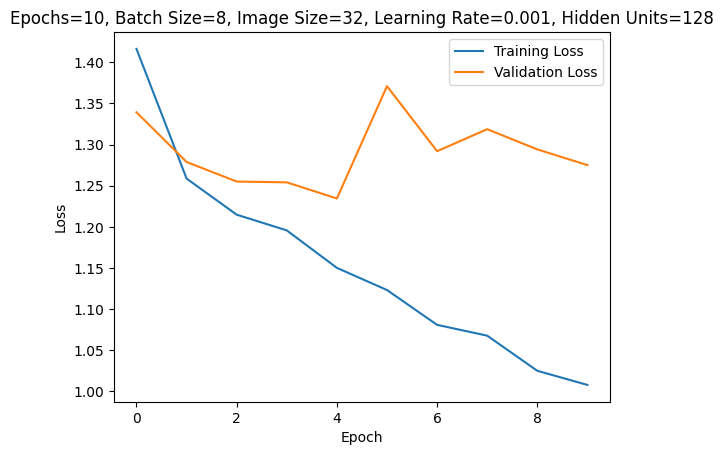

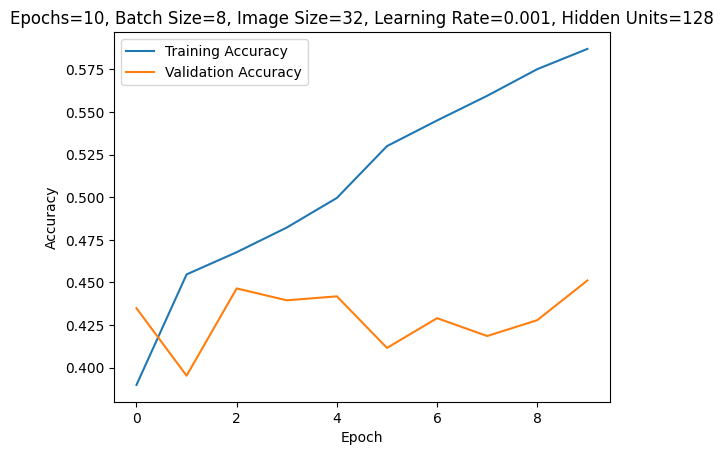

Training with: Epochs=10, Batch Size=8, Image Size=32, Learning Rate=0.0001, Hidden Units=64
Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_25 (Flatten)            │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 64)             │       196,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 196,997 (769.52 KB)

 Trainable params: 196,997 (769.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 33s 75ms/step - accuracy: 0.3036 - loss: 1.5243 - val_accuracy: 0.4105 - val_loss: 1.3416
Epoch 2/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 27s 62ms/step - accuracy: 0.4560 - loss: 1.2846 - val_accuracy: 0.4384 - val_loss: 1.3183
Epoch 3/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 39s 58ms/step - accuracy: 0.4846 - loss: 1.2242 - val_accuracy: 0.4128 - val_loss: 1.2938
Epoch 4/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 28s 64ms/step - accuracy: 0.5155 - loss: 1.1609 - val_accuracy: 0.4256 - val_loss: 1.2865
Epoch 5/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 40s 61ms/step - accuracy: 0.5100 - loss: 1.1676 - val_accuracy: 0.4512 - val_loss: 1.2627
Epoch 6/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 26s 61ms/step - accuracy: 0.5347 - loss: 1.1204 - val_accuracy: 0.4523 - val_loss: 1.2880
Epoch 7/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 40s 59ms/step - accuracy: 0.5651 - loss: 1.0822 - val_accuracy: 0.4360 - val_loss: 1.2824
Epoch 8/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 41s 59ms/step - accuracy: 0.5923 - loss: 1.0272 - 

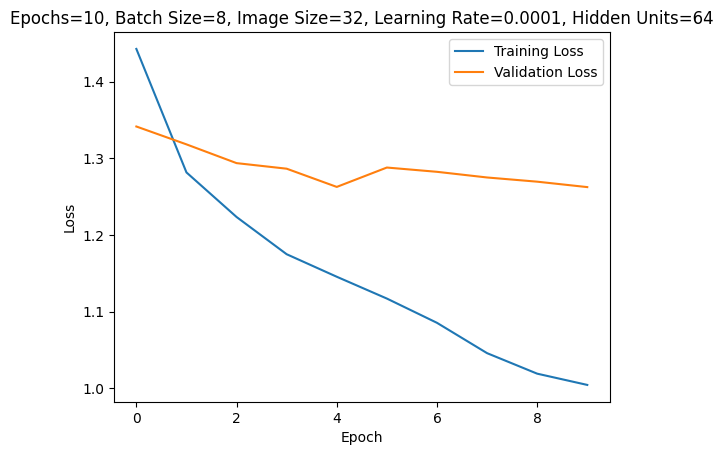

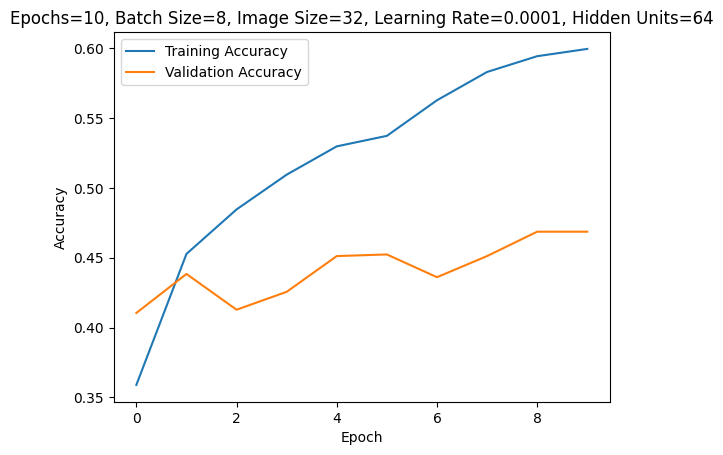

Training with: Epochs=10, Batch Size=8, Image Size=32, Learning Rate=0.0001, Hidden Units=128
Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_26 (Flatten)            │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 393,989 (1.50 MB)

 Trainable params: 393,989 (1.50 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 30s 68ms/step - accuracy: 0.3264 - loss: 1.5159 - val_accuracy: 0.4105 - val_loss: 1.3266
Epoch 2/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 39s 63ms/step - accuracy: 0.4486 - loss: 1.2788 - val_accuracy: 0.4140 - val_loss: 1.3168
Epoch 3/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 40s 60ms/step - accuracy: 0.5020 - loss: 1.1876 - val_accuracy: 0.4407 - val_loss: 1.2612
Epoch 4/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 28s 65ms/step - accuracy: 0.5255 - loss: 1.1477 - val_accuracy: 0.4593 - val_loss: 1.2673
Epoch 5/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 40s 63ms/step - accuracy: 0.5213 - loss: 1.1272 - val_accuracy: 0.4651 - val_loss: 1.2619
Epoch 6/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 40s 62ms/step - accuracy: 0.5856 - loss: 1.0494 - val_accuracy: 0.4535 - val_loss: 1.3060
Epoch 7/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 42s 64ms/step - accuracy: 0.5984 - loss: 1.0460 - val_accuracy: 0.4372 - val_loss: 1.3206
Epoch 8/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 27s 62ms/step - accuracy: 0.6052 - loss: 1.0044 - 

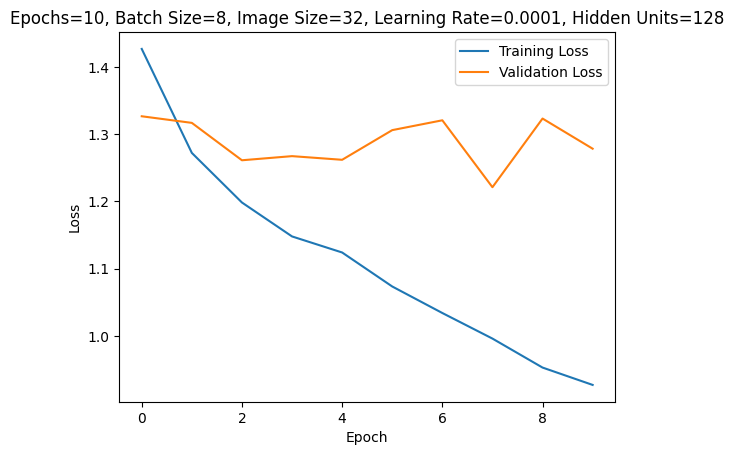

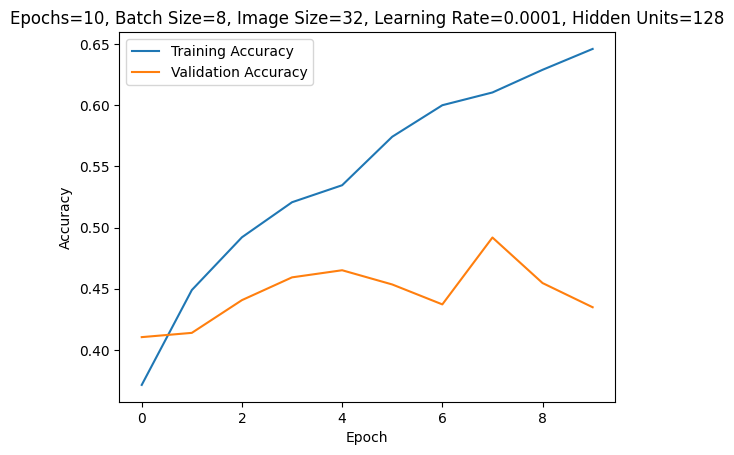

Training with: Epochs=10, Batch Size=16, Image Size=16, Learning Rate=0.001, Hidden Units=64
Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_27 (Flatten)            │ (None, 768)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 64)             │        49,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,541 (193.52 KB)

 Trainable params: 49,541 (193.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 25s 111ms/step - accuracy: 0.3473 - loss: 1.4931 - val_accuracy: 0.4233 - val_loss: 1.3010
Epoch 2/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 40s 109ms/step - accuracy: 0.4490 - loss: 1.2650 - val_accuracy: 0.4209 - val_loss: 1.2803
Epoch 3/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 41s 109ms/step - accuracy: 0.4580 - loss: 1.2353 - val_accuracy: 0.4326 - val_loss: 1.2774
Epoch 4/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 23s 106ms/step - accuracy: 0.5111 - loss: 1.1688 - val_accuracy: 0.4430 - val_loss: 1.2574
Epoch 5/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 40s 104ms/step - accuracy: 0.5146 - loss: 1.1500 - val_accuracy: 0.4500 - val_loss: 1.2395
Epoch 6/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 23s 106ms/step - accuracy: 0.5379 - loss: 1.1204 - val_accuracy: 0.4349 - val_loss: 1.2530
Epoch 7/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 41s 109ms/step - accuracy: 0.5338 - loss: 1.0933 - val_accuracy: 0.4337 - val_loss: 1.3032
Epoch 8/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 41s 109ms/step - accuracy: 0.5744 - loss: 1

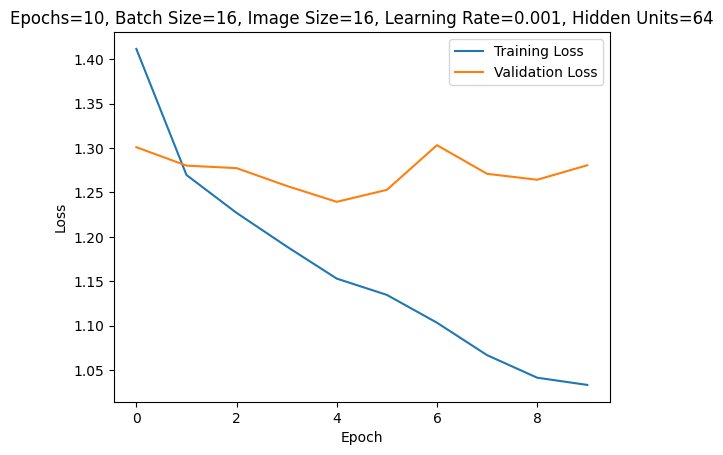

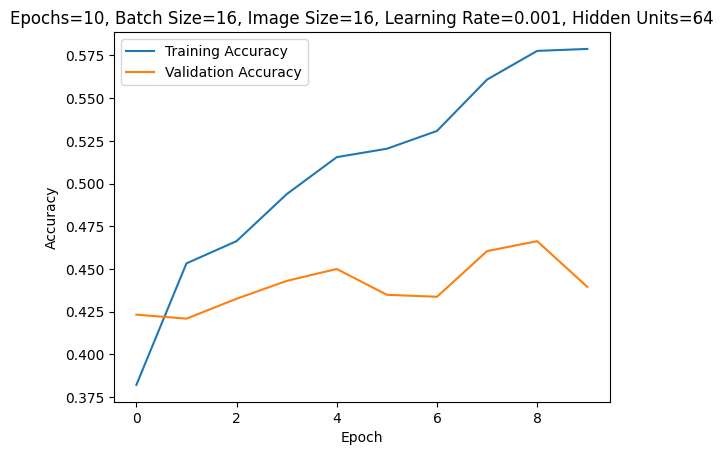

Training with: Epochs=10, Batch Size=16, Image Size=16, Learning Rate=0.001, Hidden Units=128
Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_28 (Flatten)            │ (None, 768)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 128)            │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 99,077 (387.02 KB)

 Trainable params: 99,077 (387.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 26s 113ms/step - accuracy: 0.3337 - loss: 1.5213 - val_accuracy: 0.4500 - val_loss: 1.3079
Epoch 2/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 23s 106ms/step - accuracy: 0.4367 - loss: 1.2750 - val_accuracy: 0.3081 - val_loss: 1.7373
Epoch 3/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 41s 105ms/step - accuracy: 0.4643 - loss: 1.2501 - val_accuracy: 0.4605 - val_loss: 1.2698
Epoch 4/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 41s 106ms/step - accuracy: 0.4857 - loss: 1.2009 - val_accuracy: 0.4360 - val_loss: 1.2999
Epoch 5/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 24s 110ms/step - accuracy: 0.5235 - loss: 1.1379 - val_accuracy: 0.4477 - val_loss: 1.2444
Epoch 6/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 40s 108ms/step - accuracy: 0.5576 - loss: 1.0902 - val_accuracy: 0.4663 - val_loss: 1.2384
Epoch 7/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 41s 108ms/step - accuracy: 0.5603 - loss: 1.0849 - val_accuracy: 0.4547 - val_loss: 1.2386
Epoch 8/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 23s 104ms/step - accuracy: 0.5684 - loss: 1

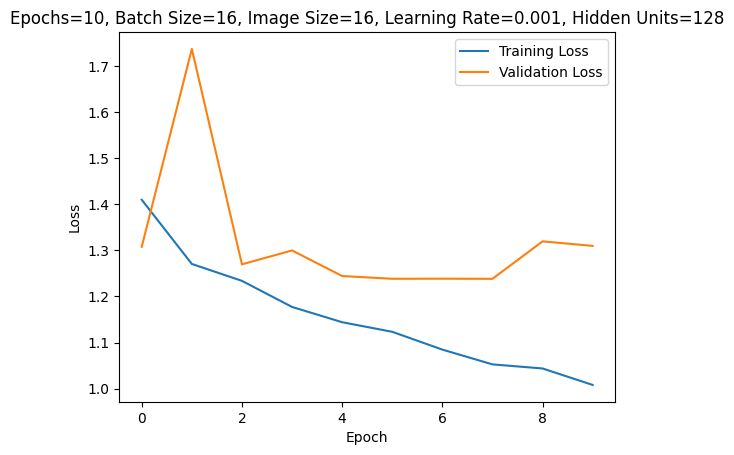

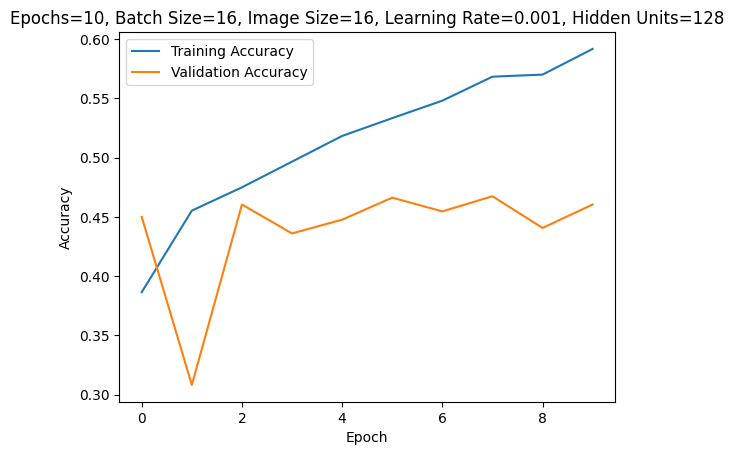

Training with: Epochs=10, Batch Size=16, Image Size=16, Learning Rate=0.0001, Hidden Units=64
Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_29 (Flatten)            │ (None, 768)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 64)             │        49,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,541 (193.52 KB)

 Trainable params: 49,541 (193.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 27s 108ms/step - accuracy: 0.2717 - loss: 1.5899 - val_accuracy: 0.3558 - val_loss: 1.4790
Epoch 2/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 22s 103ms/step - accuracy: 0.3958 - loss: 1.4285 - val_accuracy: 0.3767 - val_loss: 1.4181
Epoch 3/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 41s 105ms/step - accuracy: 0.4145 - loss: 1.3709 - val_accuracy: 0.3977 - val_loss: 1.3995
Epoch 4/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 25s 115ms/step - accuracy: 0.4311 - loss: 1.3313 - val_accuracy: 0.4000 - val_loss: 1.3700
Epoch 5/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 39s 108ms/step - accuracy: 0.4391 - loss: 1.2961 - val_accuracy: 0.4291 - val_loss: 1.3407
Epoch 6/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 42s 110ms/step - accuracy: 0.4741 - loss: 1.2536 - val_accuracy: 0.4209 - val_loss: 1.3172
Epoch 7/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 22s 103ms/step - accuracy: 0.4612 - loss: 1.2555 - val_accuracy: 0.4372 - val_loss: 1.3035
Epoch 8/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 23s 107ms/step - accuracy: 0.4972 - loss: 1

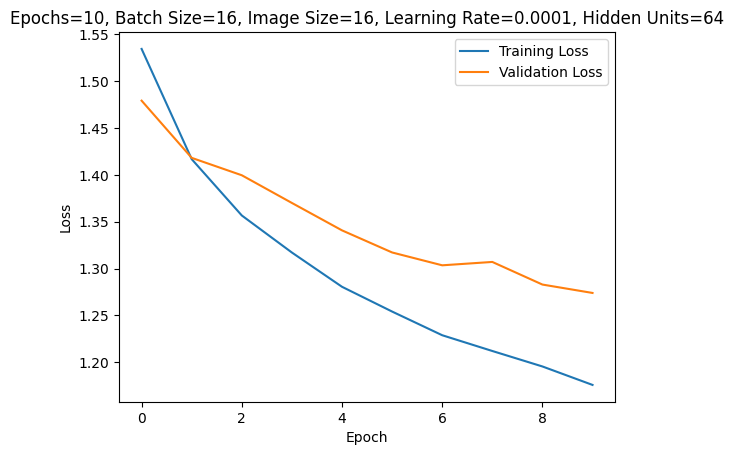

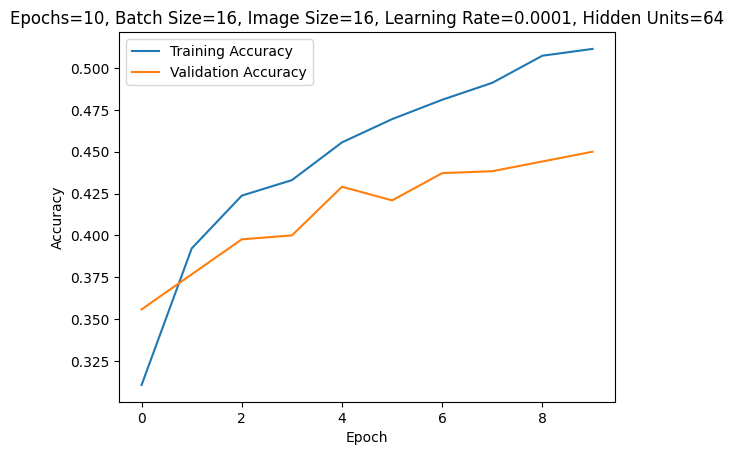

Training with: Epochs=10, Batch Size=16, Image Size=16, Learning Rate=0.0001, Hidden Units=128
Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_30 (Flatten)            │ (None, 768)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 128)            │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 99,077 (387.02 KB)

 Trainable params: 99,077 (387.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 28s 113ms/step - accuracy: 0.3035 - loss: 1.5653 - val_accuracy: 0.4000 - val_loss: 1.4292
Epoch 2/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 24s 112ms/step - accuracy: 0.4428 - loss: 1.3762 - val_accuracy: 0.4198 - val_loss: 1.3604
Epoch 3/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 41s 113ms/step - accuracy: 0.4433 - loss: 1.3087 - val_accuracy: 0.4116 - val_loss: 1.3407
Epoch 4/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 41s 112ms/step - accuracy: 0.4750 - loss: 1.2627 - val_accuracy: 0.4291 - val_loss: 1.3054
Epoch 5/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 41s 111ms/step - accuracy: 0.5050 - loss: 1.2205 - val_accuracy: 0.4430 - val_loss: 1.2954
Epoch 6/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 41s 111ms/step - accuracy: 0.5007 - loss: 1.1942 - val_accuracy: 0.4477 - val_loss: 1.2818
Epoch 7/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 23s 107ms/step - accuracy: 0.5041 - loss: 1.1900 - val_accuracy: 0.4419 - val_loss: 1.2725
Epoch 8/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 24s 111ms/step - accuracy: 0.5232 - loss: 1

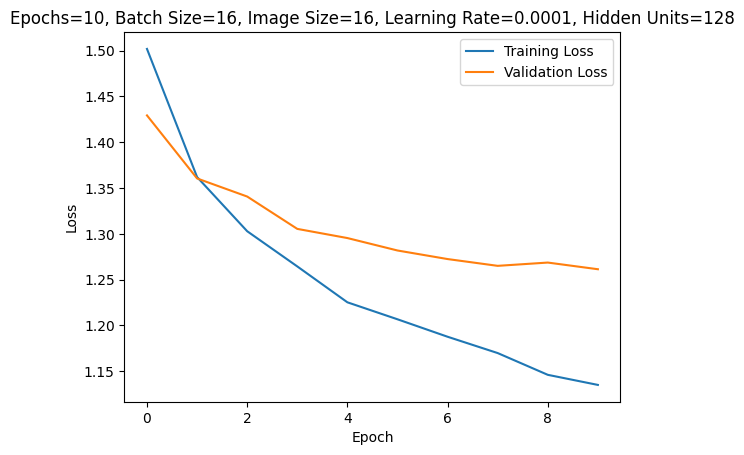

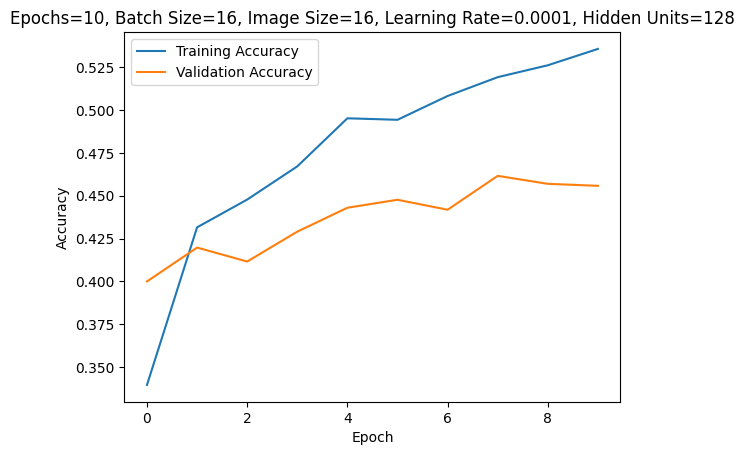

Training with: Epochs=10, Batch Size=16, Image Size=32, Learning Rate=0.001, Hidden Units=64
Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_31 (Flatten)            │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 64)             │       196,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 196,997 (769.52 KB)

 Trainable params: 196,997 (769.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 23s 102ms/step - accuracy: 0.3322 - loss: 1.5657 - val_accuracy: 0.4151 - val_loss: 1.3072
Epoch 2/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 24s 112ms/step - accuracy: 0.4328 - loss: 1.2825 - val_accuracy: 0.4070 - val_loss: 1.3943
Epoch 3/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 41s 112ms/step - accuracy: 0.4698 - loss: 1.2397 - val_accuracy: 0.4547 - val_loss: 1.2995
Epoch 4/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 41s 113ms/step - accuracy: 0.5024 - loss: 1.1835 - val_accuracy: 0.4628 - val_loss: 1.3157
Epoch 5/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 41s 115ms/step - accuracy: 0.5230 - loss: 1.1275 - val_accuracy: 0.4279 - val_loss: 1.2805
Epoch 6/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 23s 108ms/step - accuracy: 0.5257 - loss: 1.1083 - val_accuracy: 0.4605 - val_loss: 1.2622
Epoch 7/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 41s 108ms/step - accuracy: 0.5430 - loss: 1.0899 - val_accuracy: 0.4407 - val_loss: 1.2865
Epoch 8/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 24s 113ms/step - accuracy: 0.5623 - loss: 1

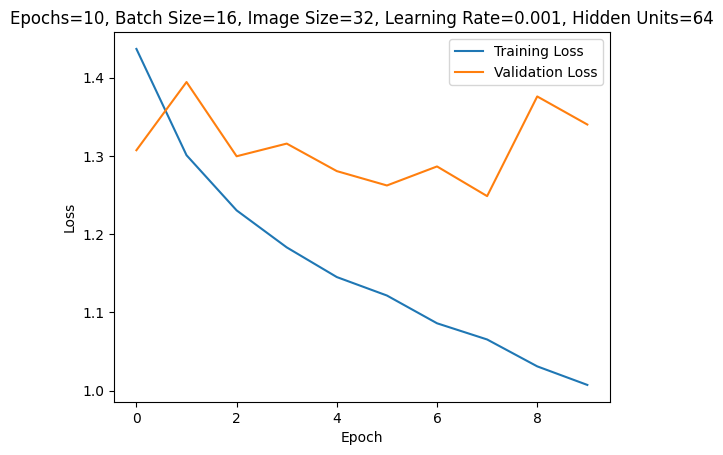

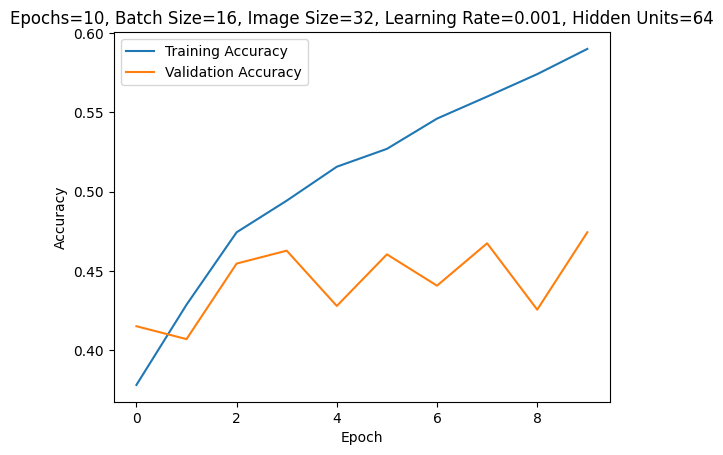

Training with: Epochs=10, Batch Size=16, Image Size=32, Learning Rate=0.001, Hidden Units=128
Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_32 (Flatten)            │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 393,989 (1.50 MB)

 Trainable params: 393,989 (1.50 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 26s 115ms/step - accuracy: 0.3469 - loss: 1.5745 - val_accuracy: 0.4023 - val_loss: 1.3867
Epoch 2/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 41s 116ms/step - accuracy: 0.4384 - loss: 1.2851 - val_accuracy: 0.4267 - val_loss: 1.2944
Epoch 3/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 24s 111ms/step - accuracy: 0.4775 - loss: 1.2180 - val_accuracy: 0.4279 - val_loss: 1.2828
Epoch 4/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 40s 109ms/step - accuracy: 0.5185 - loss: 1.1651 - val_accuracy: 0.4500 - val_loss: 1.3170
Epoch 5/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 42s 112ms/step - accuracy: 0.4969 - loss: 1.1781 - val_accuracy: 0.4256 - val_loss: 1.2596
Epoch 6/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 42s 117ms/step - accuracy: 0.5266 - loss: 1.1159 - val_accuracy: 0.4314 - val_loss: 1.3471
Epoch 7/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 24s 112ms/step - accuracy: 0.5391 - loss: 1.0910 - val_accuracy: 0.4453 - val_loss: 1.2909
Epoch 8/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 25s 115ms/step - accuracy: 0.5707 - loss: 1

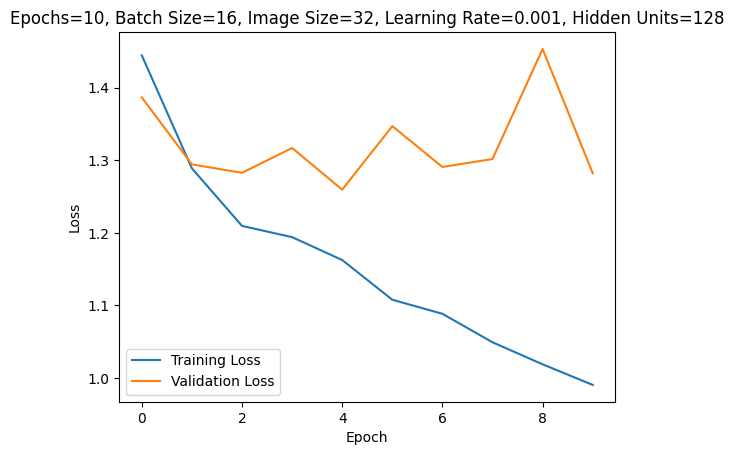

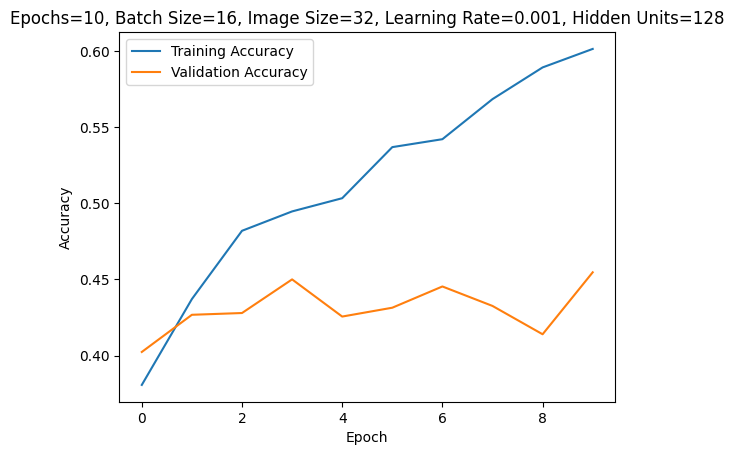

Training with: Epochs=10, Batch Size=16, Image Size=32, Learning Rate=0.0001, Hidden Units=64
Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_33 (Flatten)            │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 64)             │       196,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 196,997 (769.52 KB)

 Trainable params: 196,997 (769.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 26s 116ms/step - accuracy: 0.3262 - loss: 1.5206 - val_accuracy: 0.3895 - val_loss: 1.3869
Epoch 2/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 40s 110ms/step - accuracy: 0.4516 - loss: 1.2868 - val_accuracy: 0.4163 - val_loss: 1.3188
Epoch 3/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 42s 115ms/step - accuracy: 0.4718 - loss: 1.2124 - val_accuracy: 0.4209 - val_loss: 1.2814
Epoch 4/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 24s 111ms/step - accuracy: 0.4980 - loss: 1.1935 - val_accuracy: 0.4581 - val_loss: 1.2627
Epoch 5/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 41s 110ms/step - accuracy: 0.5174 - loss: 1.1378 - val_accuracy: 0.4360 - val_loss: 1.2584
Epoch 6/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 44s 123ms/step - accuracy: 0.5416 - loss: 1.1294 - val_accuracy: 0.4477 - val_loss: 1.2718
Epoch 7/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 24s 112ms/step - accuracy: 0.5468 - loss: 1.1166 - val_accuracy: 0.4698 - val_loss: 1.2345
Epoch 8/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 42s 115ms/step - accuracy: 0.5623 - loss: 1

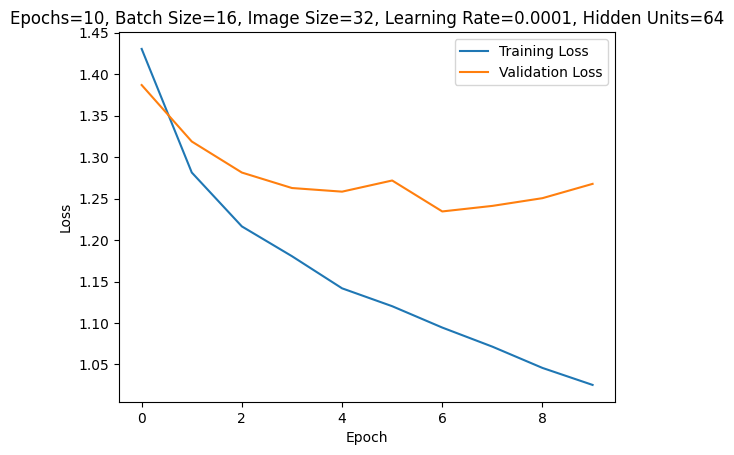

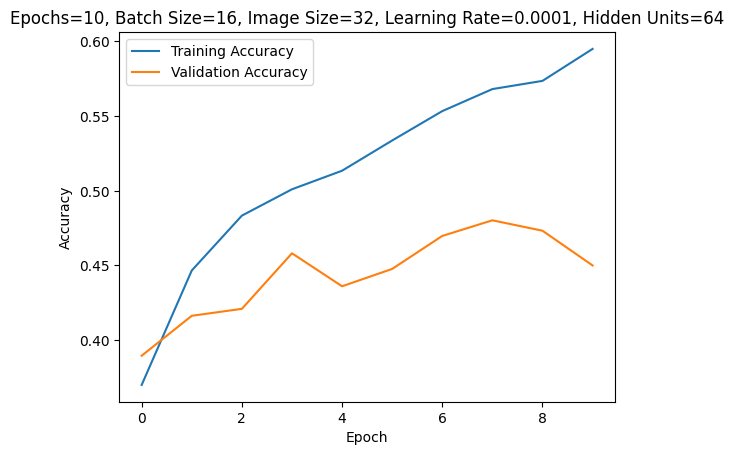

Training with: Epochs=10, Batch Size=16, Image Size=32, Learning Rate=0.0001, Hidden Units=128
Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_34 (Flatten)            │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 393,989 (1.50 MB)

 Trainable params: 393,989 (1.50 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 29s 114ms/step - accuracy: 0.3339 - loss: 1.5221 - val_accuracy: 0.4035 - val_loss: 1.3698
Epoch 2/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 37s 115ms/step - accuracy: 0.4593 - loss: 1.2725 - val_accuracy: 0.4233 - val_loss: 1.3168
Epoch 3/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 24s 110ms/step - accuracy: 0.4722 - loss: 1.2275 - val_accuracy: 0.4477 - val_loss: 1.2870
Epoch 4/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 25s 116ms/step - accuracy: 0.5100 - loss: 1.1799 - val_accuracy: 0.4535 - val_loss: 1.2419
Epoch 5/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 25s 116ms/step - accuracy: 0.5282 - loss: 1.1327 - val_accuracy: 0.4686 - val_loss: 1.2466
Epoch 6/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 41s 117ms/step - accuracy: 0.5344 - loss: 1.1045 - val_accuracy: 0.4721 - val_loss: 1.2305
Epoch 7/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 41s 118ms/step - accuracy: 0.5937 - loss: 1.0538 - val_accuracy: 0.4733 - val_loss: 1.2592
Epoch 8/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 40s 115ms/step - accuracy: 0.5903 - loss: 1

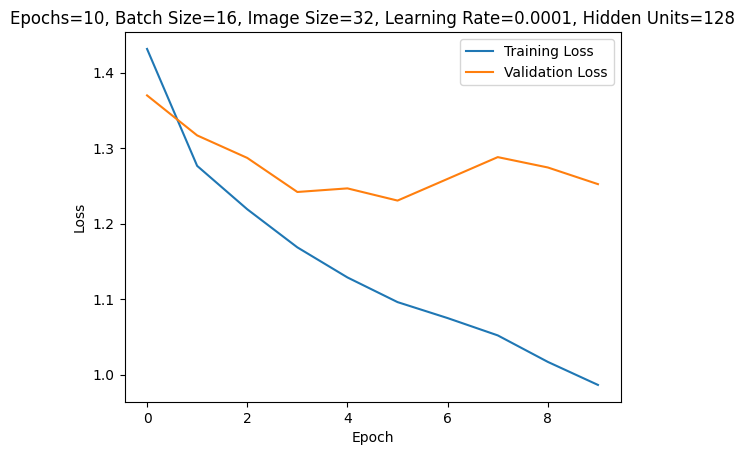

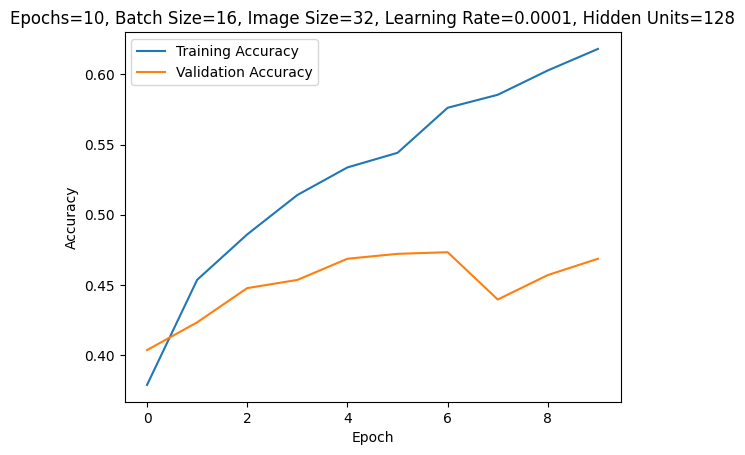


--- Summary of Results ---
Epochs=5, Batch Size=8, Image Size=16, Learning Rate=0.001, Hidden Units=64: Validation Accuracy = 0.4233
Epochs=5, Batch Size=8, Image Size=16, Learning Rate=0.001, Hidden Units=128: Validation Accuracy = 0.4105
Epochs=5, Batch Size=8, Image Size=16, Learning Rate=0.0001, Hidden Units=64: Validation Accuracy = 0.4244
Epochs=5, Batch Size=8, Image Size=16, Learning Rate=0.0001, Hidden Units=128: Validation Accuracy = 0.4500
Epochs=5, Batch Size=8, Image Size=32, Learning Rate=0.001, Hidden Units=64: Validation Accuracy = 0.4256
Epochs=5, Batch Size=8, Image Size=32, Learning Rate=0.001, Hidden Units=128: Validation Accuracy = 0.4186
Epochs=5, Batch Size=8, Image Size=32, Learning Rate=0.0001, Hidden Units=64: Validation Accuracy = 0.4267
Epochs=5, Batch Size=8, Image Size=32, Learning Rate=0.0001, Hidden Units=128: Validation Accuracy = 0.4663
Epochs=5, Batch Size=16, Image Size=16, Learning Rate=0.001, Hidden Units=64: Validation Accuracy = 0.4581
Epochs=5,

In [21]:
# prompt: I want to change all these parameter Epochs: Try values of 5 and 10.
# • Batch Size: Try values of 8 and 16.
# • Image Size: Try 16x16 and 32x32.
# • Learning Rate: Try 0.001 and 0.0001.
# • Hidden Layers: Add a hidden layer. Explore 64 and 128 units. Please generate a code accordingly

# Define parameter ranges to iterate over
epochs_list = [5, 10]
batch_size_list = [8, 16]
image_size_list = [16, 32] # Assuming square images
learning_rate_list = [0.001, 0.0001]
hidden_layer_units_list = [64, 128] # Units for the added hidden layer

results = {}

for epochs in epochs_list:
  for batch_size in batch_size_list:
    for img_size in image_size_list:
      for learning_rate in learning_rate_list:
        for hidden_units in hidden_layer_units_list:
          print(f"Training with: Epochs={epochs}, Batch Size={batch_size}, Image Size={img_size}, Learning Rate={learning_rate}, Hidden Units={hidden_units}")

          img_height = img_size
          img_width = img_size

          # Create train and validation data generators
          datagen = ImageDataGenerator(
              rescale=1./255,
              validation_split=0.2
          )

          train_generator = datagen.flow_from_directory(
              data_dir,
              target_size=(img_height, img_width),
              batch_size=batch_size,
              class_mode='categorical',
              subset='training'
          )

          val_generator = datagen.flow_from_directory(
              data_dir,
              target_size=(img_height, img_width),
              batch_size=batch_size,
              class_mode='categorical',
              subset='validation'
          )

          # Build the model with the added hidden layer
          model = models.Sequential([
              layers.Flatten(input_shape=(img_height, img_width, 3)),
              layers.Dense(hidden_units, activation='relu'), # Added hidden layer
              layers.Dense(train_generator.num_classes, activation='softmax')
          ])

          # Compile the model with the current learning rate
          optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
          model.compile(optimizer=optimizer,
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

          model.summary()

          # Train the model
          history = model.fit(
              train_generator,
              validation_data=val_generator,
              epochs=epochs
          )

          # Store the results (e.g., final validation accuracy)
          final_val_accuracy = history.history['val_accuracy'][-1]
          params = f"Epochs={epochs}, Batch Size={batch_size}, Image Size={img_size}, Learning Rate={learning_rate}, Hidden Units={hidden_units}"
          results[params] = final_val_accuracy
          print(f"Finished training with: {params}, Final Validation Accuracy: {final_val_accuracy}")

          # You might also want to plot the training history for each run if needed
          plt.plot(history.history["loss"], label="Training Loss")
          plt.plot(history.history["val_loss"], label="Validation Loss")
          plt.xlabel("Epoch")
          plt.ylabel("Loss")
          plt.title(params)
          plt.legend()
          plt.show()

          plt.plot(history.history["accuracy"], label="Training Accuracy")
          plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
          plt.xlabel("Epoch")
          plt.ylabel("Accuracy")
          plt.title(params)
          plt.legend()
          plt.show()

# Print all results
print("\n--- Summary of Results ---")
for params, accuracy in results.items():
    print(f"{params}: Validation Accuracy = {accuracy:.4f}")

# Optionally, find the best performing parameters
best_params = max(results, key=results.get)
print(f"\nBest performing parameters: {best_params} with Validation Accuracy: {results[best_params]:.4f}")